In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

import glob
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages
!whoami

ihme\yongqx2


In [2]:
# /ihme/costeffectiveness/results/vivarium_csu_swissre_cancer/v3.2_ramp_up/swissre_coverage/2020_07_06_09_48_10/count_data
master_dir = 'C:/Users/yongqx2/Desktop/Sim Science/Swiss RE Cancer/count_data_model_3/'

In [3]:
person_time = pd.read_csv(master_dir + 'person_time.csv').iloc[:, 1:]
transition_count = pd.read_csv(master_dir + 'transition_count.csv').iloc[:, 1:]

In [4]:
transition_count.measure.unique()

array(['susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count',
       'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count',
       'ductal_carcinoma_in_situ_to_breast_cancer_event_count',
       'lobular_carcinoma_in_situ_to_breast_cancer_event_count',
       'negative_screening_to_positive_screening_lobular_carcinoma_in_situ_event_count',
       'negative_screening_to_positive_screening_ductal_carcinoma_in_situ_event_count',
       'positive_screening_ductal_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count',
       'positive_screening_lobular_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count',
       'positive_screening_breast_cancer_to_negative_screening_event_count',
       'positive_screening_breast_cancer_to_positive_screening_lobular_carcinoma_in_situ_event_count',
       'positive_screening_breast_cancer_to_positive_screening_ductal_carcinoma_in_situ_event_count',
       'susceptible_t'], dtype=object)

In [5]:
cols = ['age_cohort', 'sex', 'year', 'input_draw', 'scenario', 'measure']

In [6]:
def count_addition(df: pd.DataFrame, measure_dcis: str, measure_lcis: str, measure_bc: str):
    count_from_dcis = (df
                       .query(f'measure == "{measure_dcis}"')
                       .drop(columns='measure')
                       .set_index([c for c in cols if c != 'measure']))

    count_from_lcis = (df
                       .query(f'measure == "{measure_lcis}"')
                       .drop(columns='measure')
                       .set_index([c for c in cols if c != 'measure']))

    total = (count_from_dcis + count_from_lcis).reset_index()
    total['measure'] = measure_bc
    return total

In [7]:
# breast_cancer_incidence_count = dcis_to_bc_count + lcis_to_bc_count
bc_incidence_count = count_addition(transition_count,
                                    'ductal_carcinoma_in_situ_to_breast_cancer_event_count', 
                                    'lobular_carcinoma_in_situ_to_breast_cancer_event_count', 
                                    'breast_carcinoma_in_situ_to_breast_cancer_event_count')

bc_incidence_count

age_cohort     sex  year  input_draw     scenario  value  \
0       2000_to_2005  female  2020           3  alternative    0.0   
1       1995_to_2000  female  2020           3  alternative    1.0   
2       1990_to_1995  female  2020           3  alternative   30.0   
3       1985_to_1990  female  2020           3  alternative   67.0   
...              ...     ...   ...         ...          ...    ...   
106825  1975_to_1980    male  2038         177  alternative    1.0   
106826  1970_to_1975    male  2038         177  alternative    5.0   
106827  1965_to_1970    male  2038         177  alternative    7.0   
106828  1960_to_1965    male  2038         177  alternative    5.0   

                                                  measure  
0       breast_carcinoma_in_situ_to_breast_cancer_even...  
1       breast_carcinoma_in_situ_to_breast_cancer_even...  
2       breast_carcinoma_in_situ_to_breast_cancer_even...  
3       breast_carcinoma_in_situ_to_breast_cancer_even...  
...                                                   ...  
106825  breast_carcinoma_in_situ_to_breast_cancer_even...  
106826  breast_carcinoma_in_situ_to_breast_cancer_even...  
106827  breast_carcinoma_in_situ_to_breast_cancer_even...  
106828  breast_carcinoma_in_situ_to_breast_cancer_even...  

[106829 rows x 7 columns]

In [8]:
# breast_cancer_detection_count = dcis_to_bc_detected_count + lcis_to_bc_detected_count 
bc_detection_count = count_addition(transition_count,
                                    'positive_screening_ductal_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count', 
                                    'positive_screening_lobular_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count', 
                                    'positive_screening_breast_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count')

bc_detection_count

age_cohort     sex  year  input_draw     scenario  value  \
0       2000_to_2005  female  2020           3  alternative    0.0   
1       1995_to_2000  female  2020           3  alternative    0.0   
2       1990_to_1995  female  2020           3  alternative    0.0   
3       1985_to_1990  female  2020           3  alternative    0.0   
...              ...     ...   ...         ...          ...    ...   
106825  1975_to_1980    male  2038         177  alternative    0.0   
106826  1970_to_1975    male  2038         177  alternative    0.0   
106827  1965_to_1970    male  2038         177  alternative    0.0   
106828  1960_to_1965    male  2038         177  alternative    0.0   

                                                  measure  
0       positive_screening_breast_carcinoma_in_situ_to...  
1       positive_screening_breast_carcinoma_in_situ_to...  
2       positive_screening_breast_carcinoma_in_situ_to...  
3       positive_screening_breast_carcinoma_in_situ_to...  
...                                                   ...  
106825  positive_screening_breast_carcinoma_in_situ_to...  
106826  positive_screening_breast_carcinoma_in_situ_to...  
106827  positive_screening_breast_carcinoma_in_situ_to...  
106828  positive_screening_breast_carcinoma_in_situ_to...  

[106829 rows x 7 columns]

In [9]:
count = pd.concat([transition_count, bc_incidence_count, bc_detection_count], ignore_index=True)
count

sex  year  input_draw     scenario  value    age_cohort  \
0        female  2020           3  alternative    1.0  2000_to_2005   
1        female  2020           3  alternative    0.0  2000_to_2005   
2        female  2020           3  alternative    0.0  2000_to_2005   
3        female  2020           3  alternative    0.0  2000_to_2005   
...         ...   ...         ...          ...    ...           ...   
1495603    male  2038         177  alternative    0.0  1975_to_1980   
1495604    male  2038         177  alternative    0.0  1970_to_1975   
1495605    male  2038         177  alternative    0.0  1965_to_1970   
1495606    male  2038         177  alternative    0.0  1960_to_1965   

                                                   measure  
0        susceptible_to_breast_cancer_to_lobular_carcin...  
1        susceptible_to_breast_cancer_to_ductal_carcino...  
2        ductal_carcinoma_in_situ_to_breast_cancer_even...  
3        lobular_carcinoma_in_situ_to_breast_cancer_eve...  
...                                                    ...  
1495603  positive_screening_breast_carcinoma_in_situ_to...  
1495604  positive_screening_breast_carcinoma_in_situ_to...  
1495605  positive_screening_breast_carcinoma_in_situ_to...  
1495606  positive_screening_breast_carcinoma_in_situ_to...  

[1495607 rows x 7 columns]

In [10]:
%%time

rate = (count.set_index(cols)
        .div(person_time.drop(columns='measure').set_index([c for c in cols if c != 'measure']))
        .mul(100_000)
        .reset_index())

rate_summary = (rate
                .groupby([c for c in cols if c != 'input_draw'])
                .value.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())

Wall time: 1min 10s


In [11]:
rate_summary

age_cohort     sex  year     scenario  \
0      1935_to_1940  female  2020  alternative   
1      1935_to_1940  female  2020  alternative   
2      1935_to_1940  female  2020  alternative   
3      1935_to_1940  female  2020  alternative   
...             ...     ...   ...          ...   
14193  2000_to_2005    male  2038     baseline   
14194  2000_to_2005    male  2038     baseline   
14195  2000_to_2005    male  2038     baseline   
14196  2000_to_2005    male  2038     baseline   

                                                 measure       mean  \
0      breast_carcinoma_in_situ_to_breast_cancer_even...  78.664023   
1      ductal_carcinoma_in_situ_to_breast_cancer_even...  63.155726   
2      lobular_carcinoma_in_situ_to_breast_cancer_eve...  15.508296   
3      negative_screening_to_positive_screening_ducta...   0.000000   
...                                                  ...        ...   
14193  positive_screening_ductal_carcinoma_in_situ_to...   0.000000   
14194  positive_screening_lobular_carcinoma_in_situ_t...   0.000000   
14195  susceptible_to_breast_cancer_to_ductal_carcino...   0.052632   
14196  susceptible_to_breast_cancer_to_lobular_carcin...   0.000000   

            2.5%       97.5%  
0      39.367383  114.985816  
1      23.499072  101.323978  
2       0.000000   41.395983  
3       0.000000    0.000000  
...          ...         ...  
14193   0.000000    0.000000  
14194   0.000000    0.000000  
14195   0.000000    0.274910  
14196   0.000000    0.000000  

[14197 rows x 8 columns]

In [12]:
rate_summary.query(
'scenario == "baseline" and measure == "breast_carcinoma_in_situ_to_breast_cancer_event_count"'
).to_csv('C:/Users/yongqx2/Desktop/Sim Science/Swiss RE Cancer/breast_cancer_incidence_from_sim_baseline.csv')

In [ ]:
# def plot_over_year(data: pd.DataFrame, measure: str, age_cohort: str, sex='female'):
#     data = data.copy()
#     data.year = data.year.astype(str)
#     data_sub = data[(data_sub.measure == detection_measure) & (data.age_cohort == age_cohort) & (data.sex == sex)]
    
#     plt.figure(figsize=(8, 6), dpi=150)

#     for scenario in ['baseline', 'alternative']:
#         data_scenario = data_sub[data_sub.scenario == scenario]
#         plt.plot(data_scenario.year, data_scenario['mean'] , marker='o', label=scenario)
#         plt.fill_between(data_scenario.year, data_scenario['2.5%'], data_scenario['97.5%'], alpha=.3)

#     if measure == 'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count':
#         outcome = 'DCIS incidence'
#     elif measure == 'susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count':
#         outcome = 'LCIS incidence'
#     elif measure == 'breast_carcinoma_in_situ_to_breast_cancer_event_count':
#         outcome = 'Breast cancer incidence'
#     elif measure == 'negative_screening_to_positive_screening_ductal_carcinoma_in_situ_event_count':
#         outcome = 'DCIS detection'
#     elif measure == 'negative_screening_to_positive_screening_lobular_carcinoma_in_situ_event_count':
#         outcome = 'LCIS detection'
#     elif measure == 'positive_screening_breast_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count':
#         outcome = 'Breast cancer detection'
#     else: outcome = measure
    
#     birth_cohort_start, birth_cohort_end = age_cohort.split('_to_')
    
#     plt.xlabel('Year')
#     plt.xticks([0, 5, 10, 15, 20], [2020, 2025, 2030, 2035, 2040])
#     plt.ylabel('Cases per 100,000 person-years')
#     plt.title(f'{outcome} in women born from {birth_cohort_start} to {birth_cohort_end}')
#     plt.legend(loc=(1.05, .1))

In [34]:
def plot_over_year(data: pd.DataFrame, detection_measure: str, incidence_measure: str, age_cohort: str, sex='female'):
    data = data.copy()
    data.year = data.year.astype(str)
    data_sub = data[(data.age_cohort == age_cohort) & (data.sex == sex)]
    data_detection = data_sub[data_sub.measure == detection_measure]
    data_incidence = data_sub[(data_sub.measure == incidence_measure) & (data_sub.scenario == 'baseline')]
    
    plt.figure(figsize=(8, 6), dpi=150)
    plt.plot(data_incidence.year, data_incidence['mean'] , marker='o', label='Incidence in baseline')
    plt.fill_between(data_incidence.year, data_incidence['2.5%'], data_incidence['97.5%'], alpha=.3)
    
    for scenario in ['baseline', 'alternative']:
        data_scenario = data_detection[data_detection.scenario == scenario]
        plt.plot(data_scenario.year, data_scenario['mean'] , marker='o', label=scenario)
        plt.fill_between(data_scenario.year, data_scenario['2.5%'], data_scenario['97.5%'], alpha=.3)

    if  detection_measure == 'negative_screening_to_positive_screening_ductal_carcinoma_in_situ_event_count':
        outcome = 'DCIS detection'
    elif  detection_measure == 'negative_screening_to_positive_screening_lobular_carcinoma_in_situ_event_count':
        outcome = 'LCIS detection'
    elif  detection_measure == 'positive_screening_breast_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count':
        outcome = 'Breast cancer detection'
    else: outcome =  detection_measure
    
    birth_cohort_start, birth_cohort_end = age_cohort.split('_to_')
    
    plt.xlabel('Year')
    plt.xticks([0, 5, 10, 15, 20], [2020, 2025, 2030, 2035, 2040])
    plt.ylabel('Cases per 100,000 person-years')
    plt.title(f'{outcome} in women born from {birth_cohort_start} to {birth_cohort_end}')
    plt.legend(loc=(1.05, .1))

In [27]:
detection_measures = [
    'positive_screening_breast_carcinoma_in_situ_to_positive_screening_breast_cancer_event_count',
    'negative_screening_to_positive_screening_ductal_carcinoma_in_situ_event_count',
    'negative_screening_to_positive_screening_lobular_carcinoma_in_situ_event_count',
]
incidence_measures = [
    'breast_carcinoma_in_situ_to_breast_cancer_event_count',
    'susceptible_to_breast_cancer_to_ductal_carcinoma_in_situ_event_count',
    'susceptible_to_breast_cancer_to_lobular_carcinoma_in_situ_event_count',
]
measures = list(zip(detection_measures, incidence_measures))
age_cohorts = rate_summary.age_cohort.unique()[::-1]

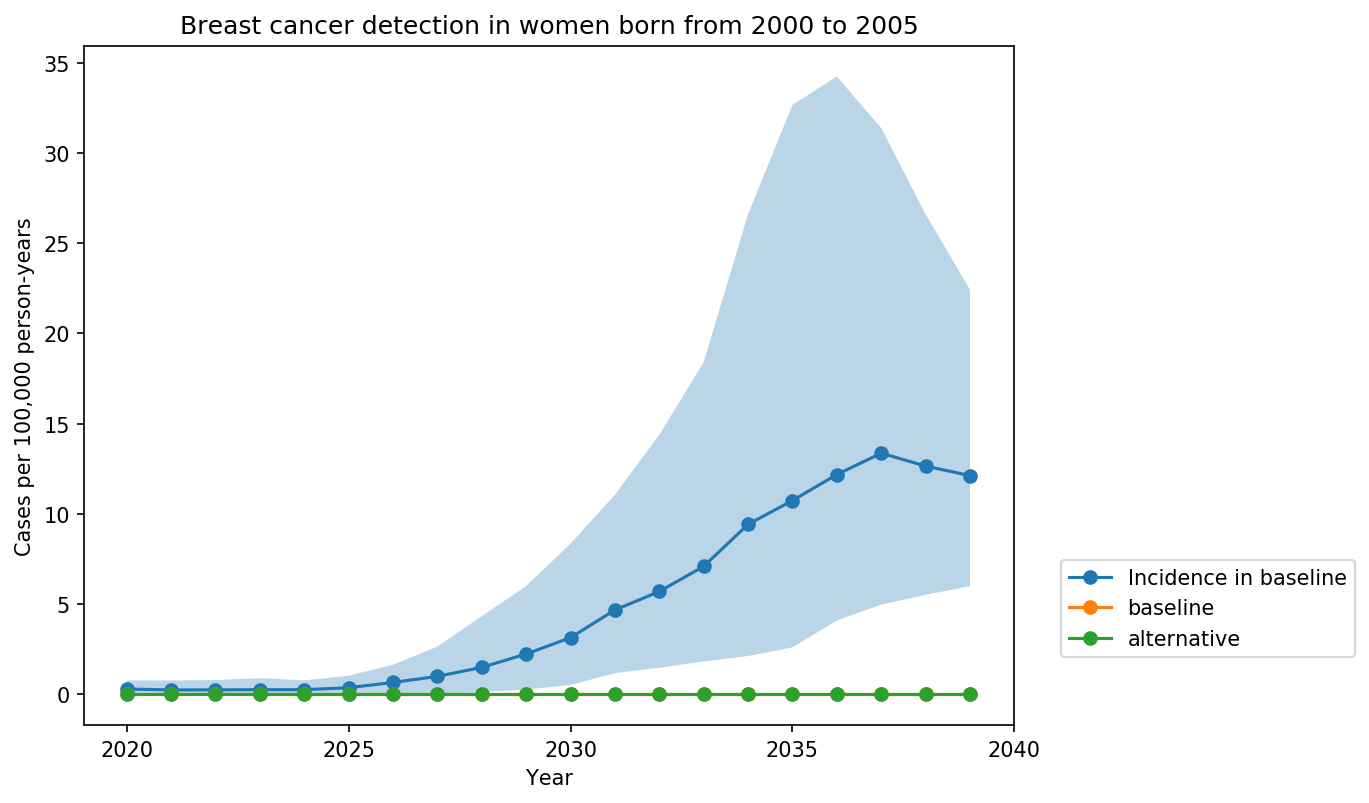

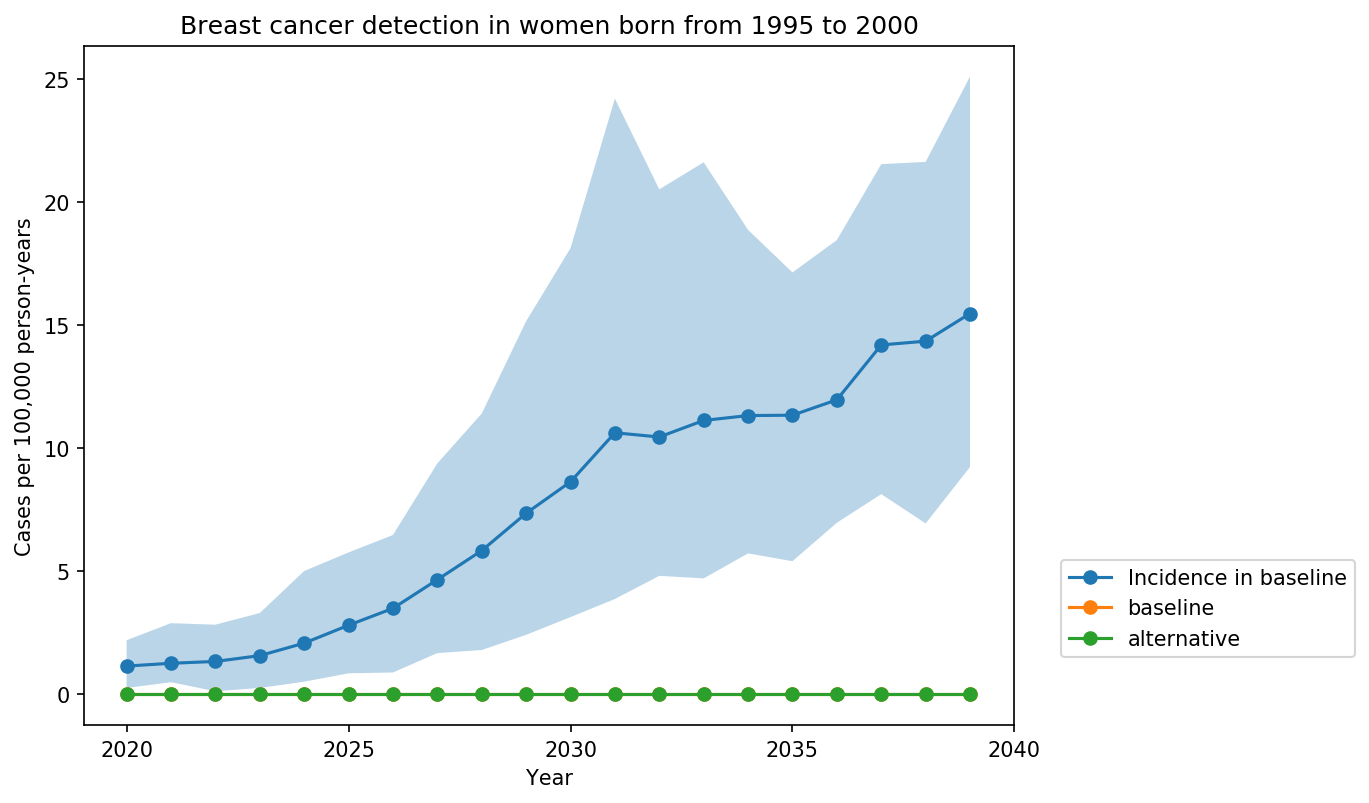

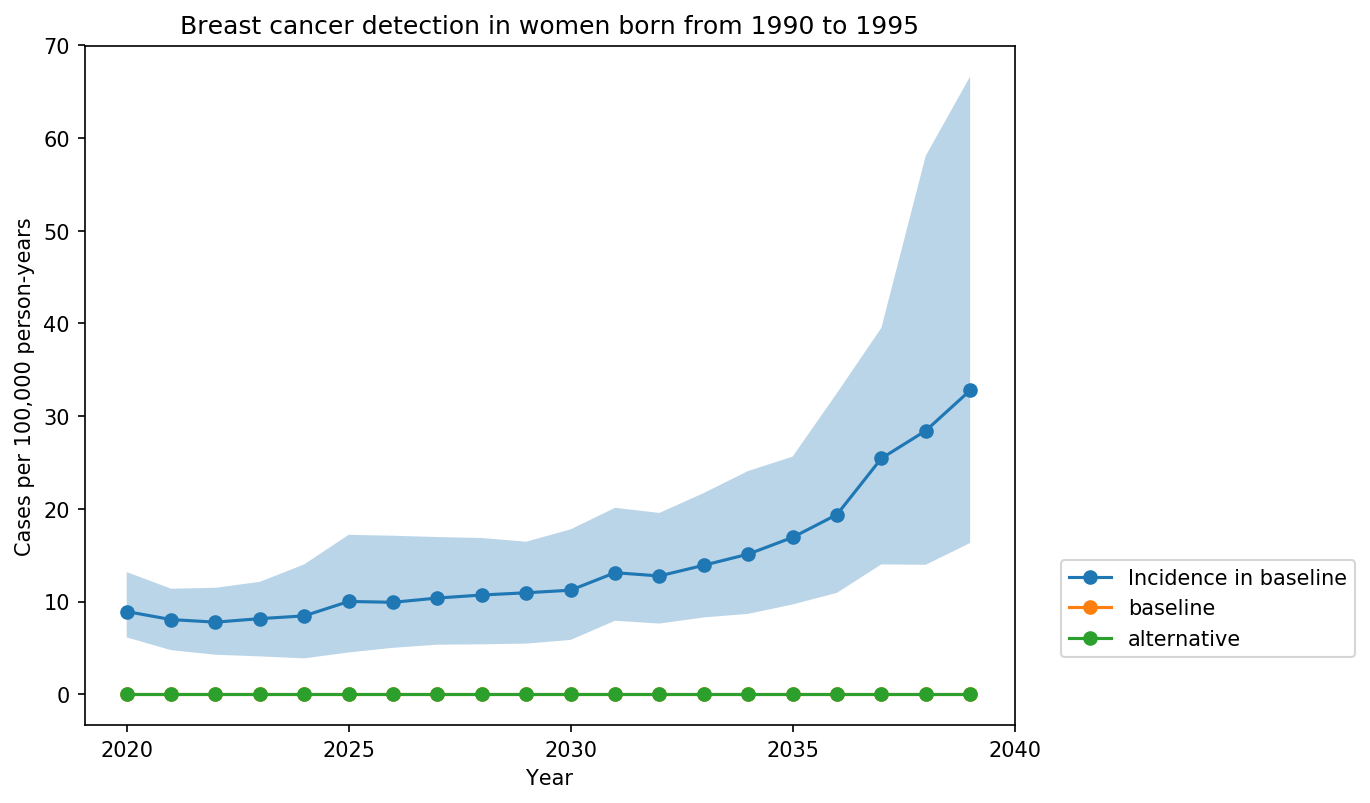

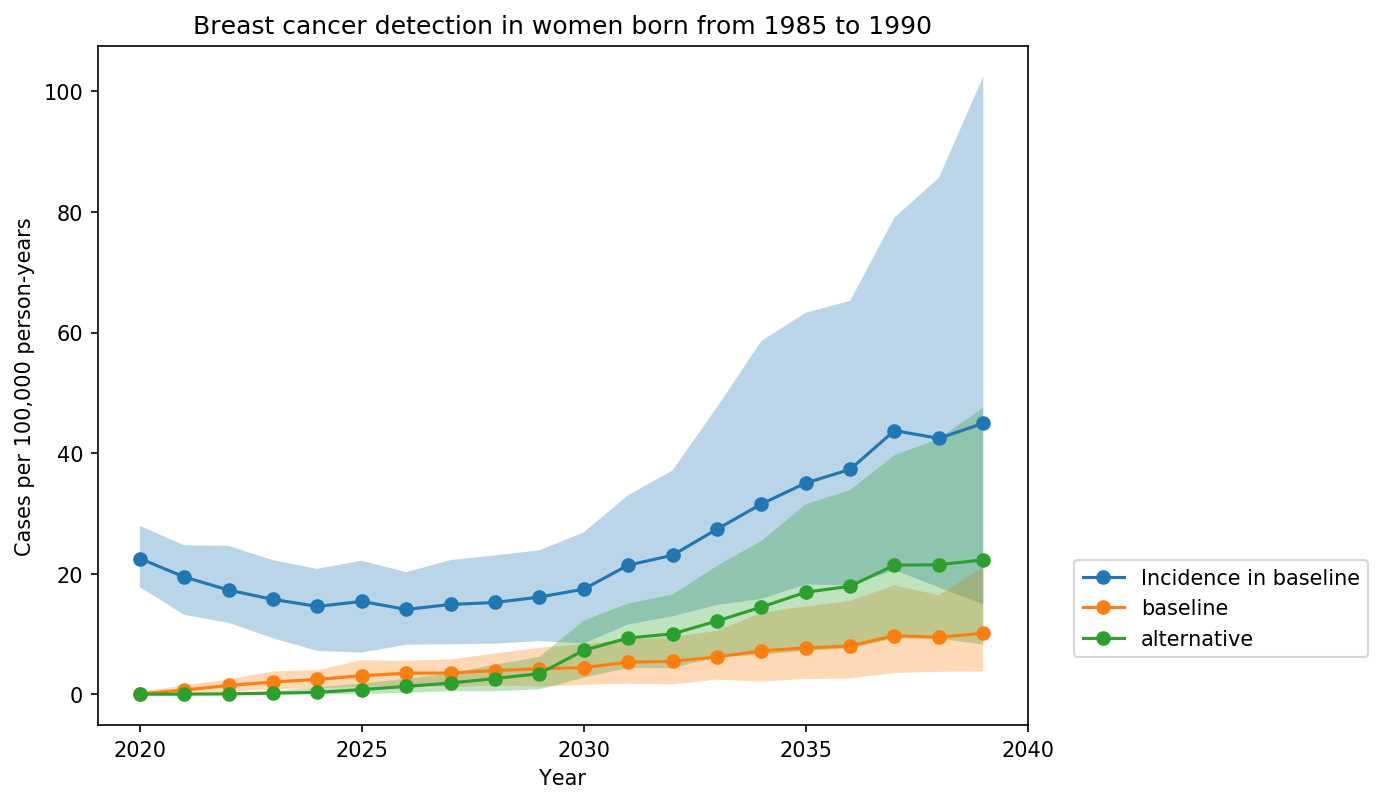

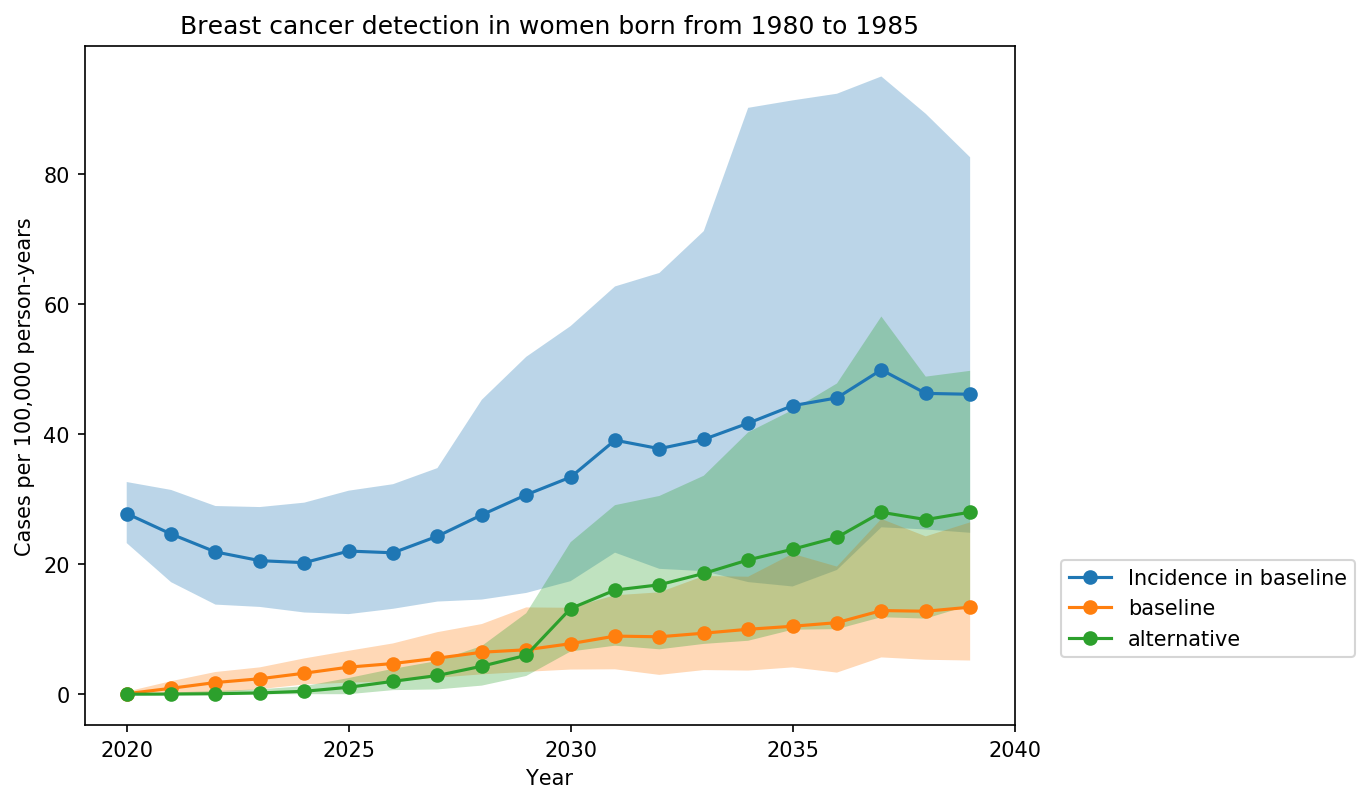

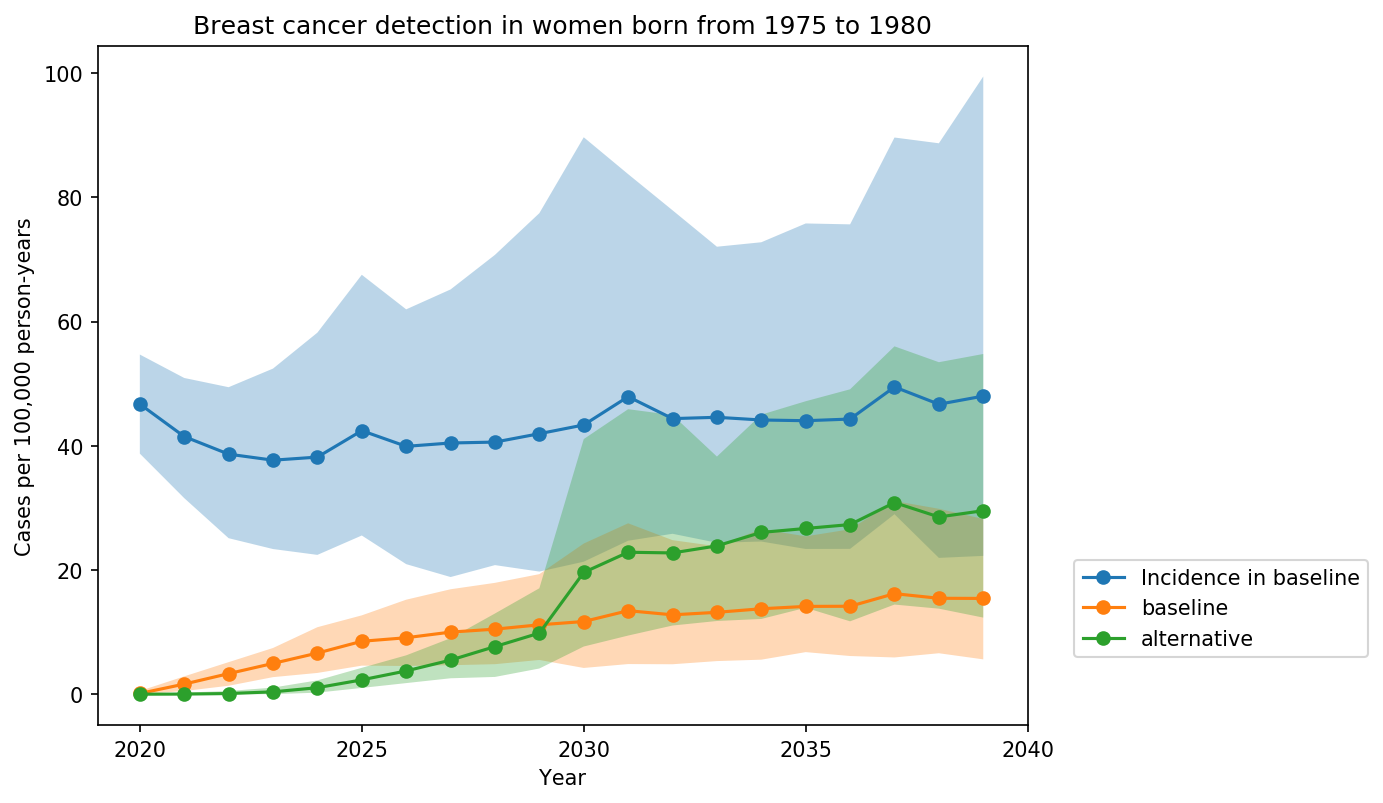

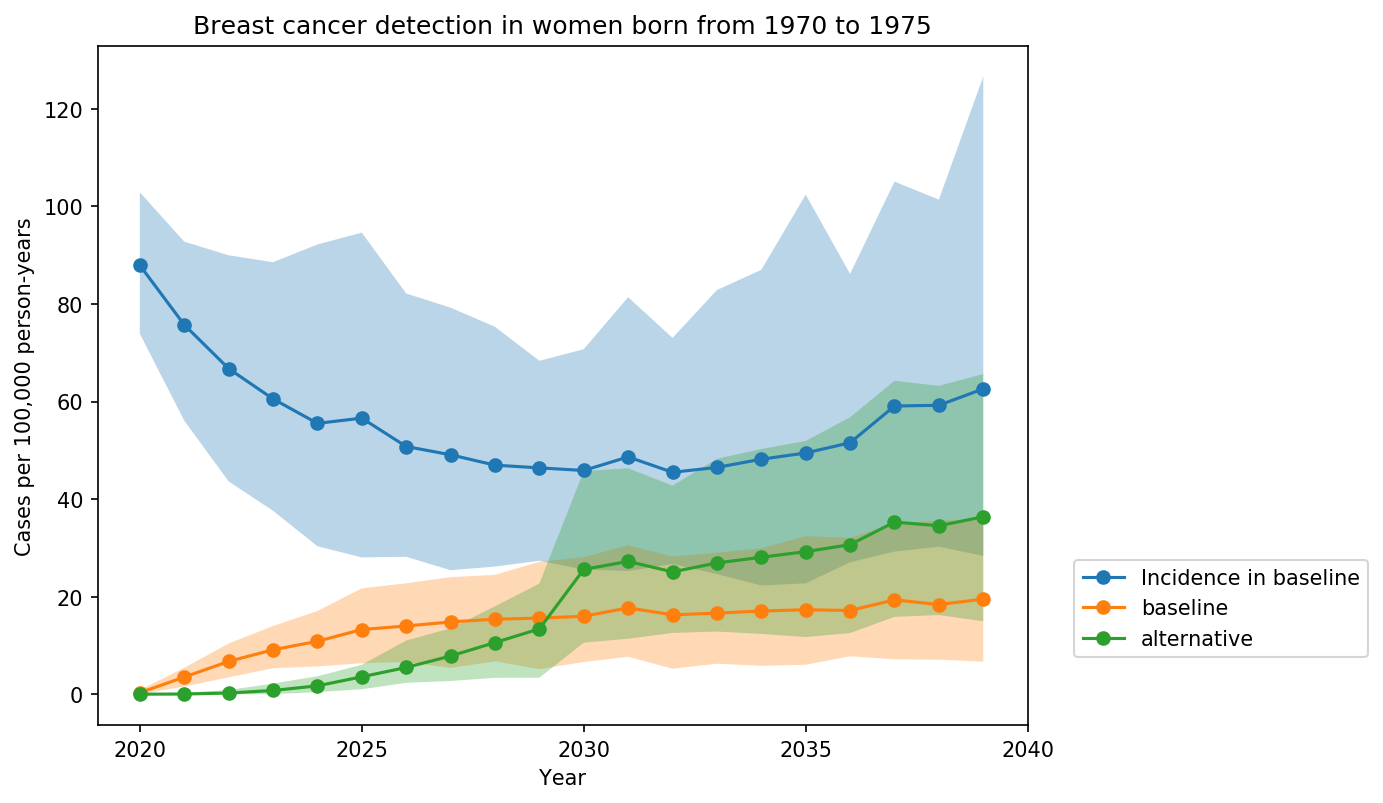

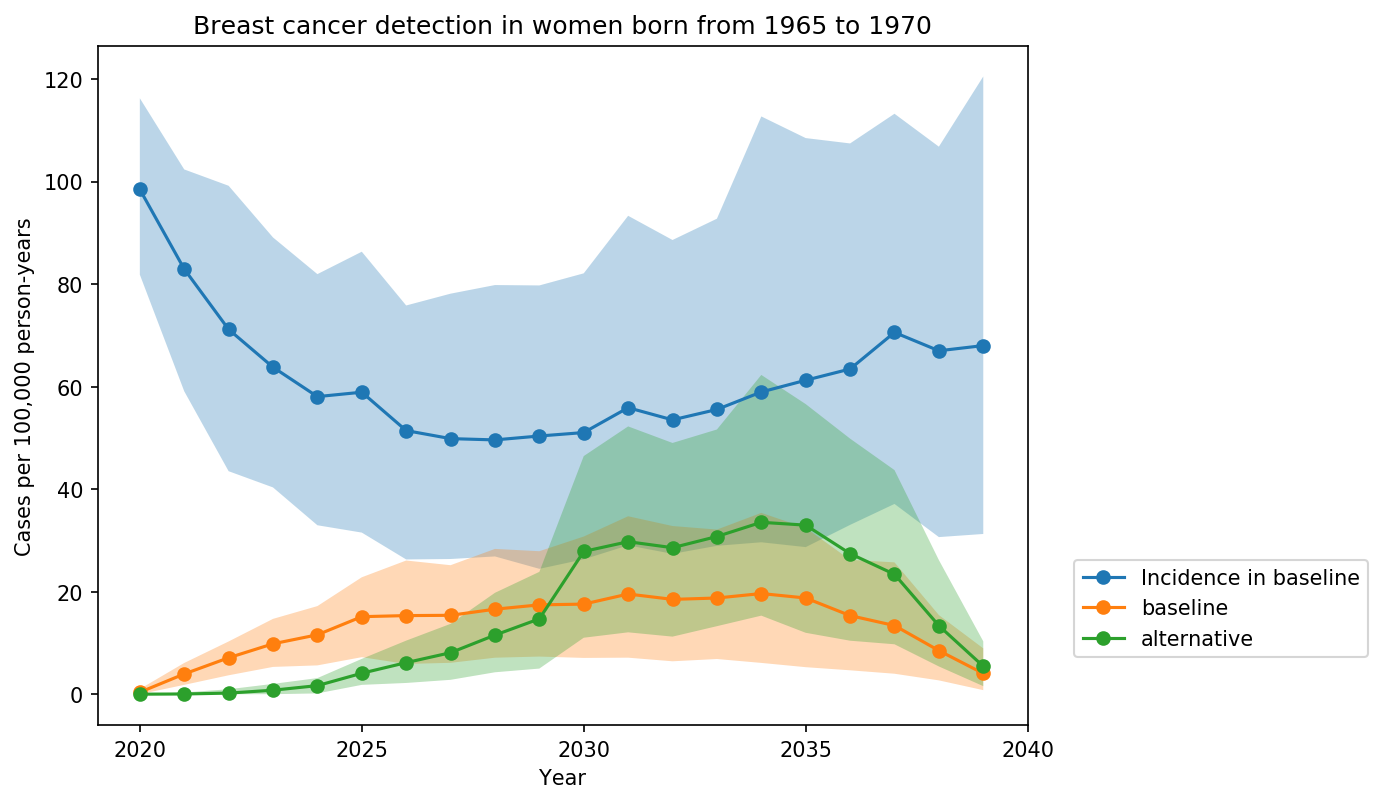

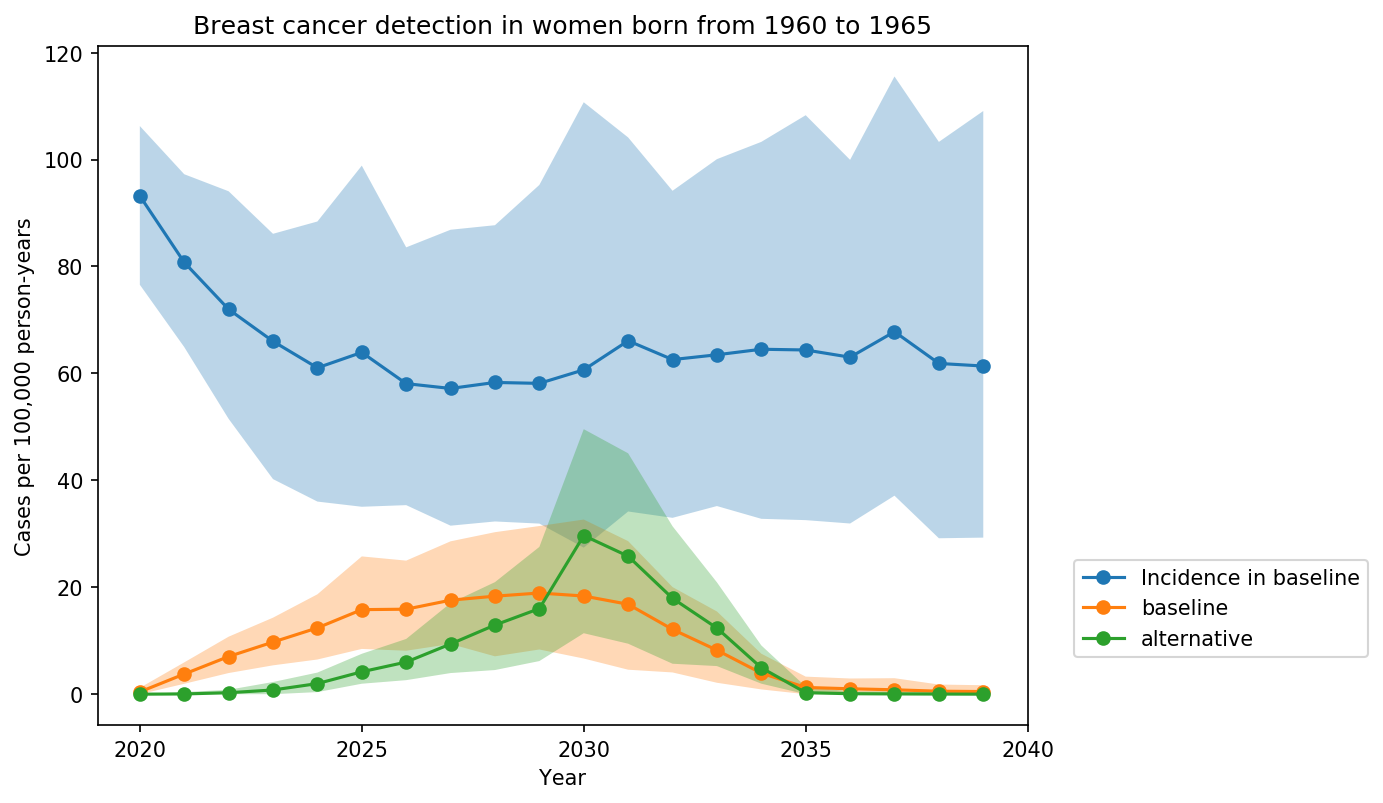

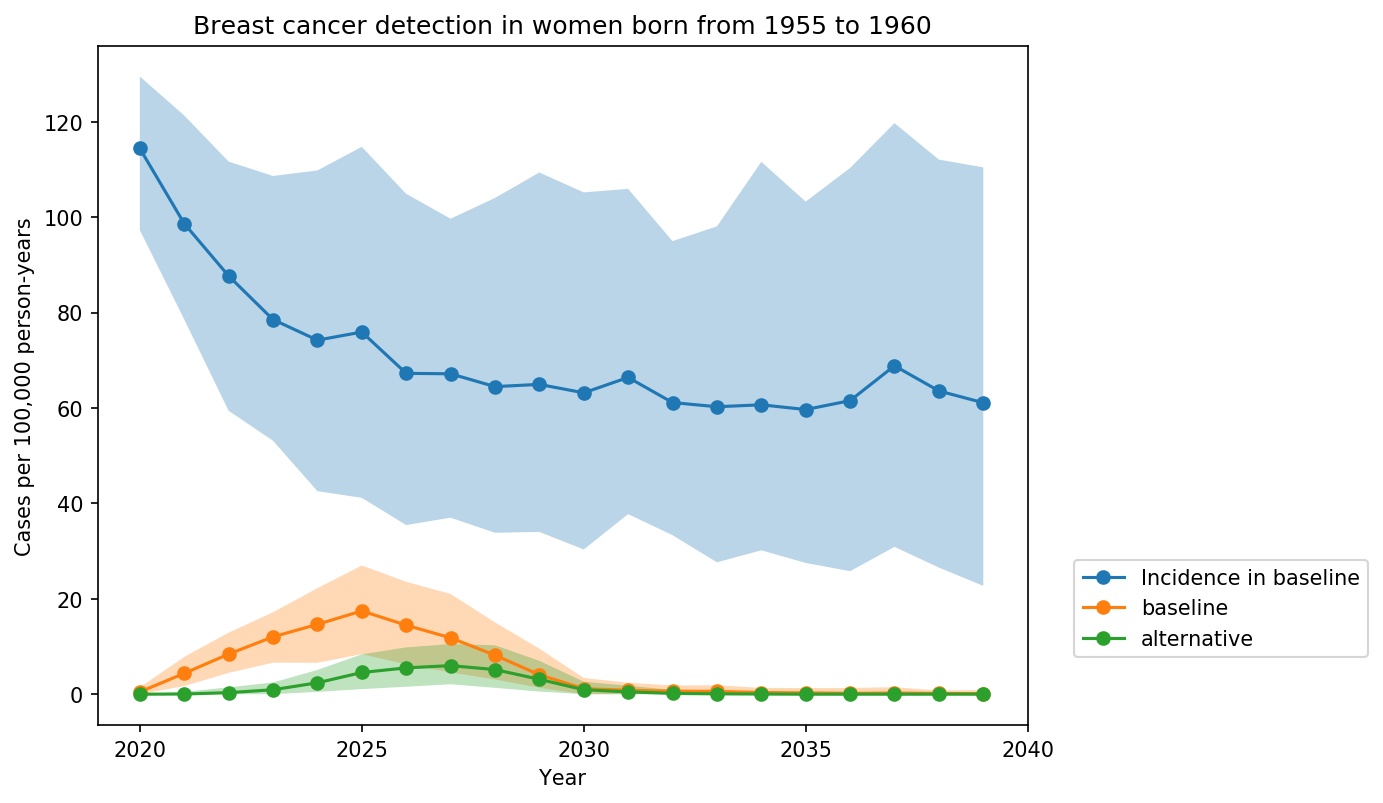

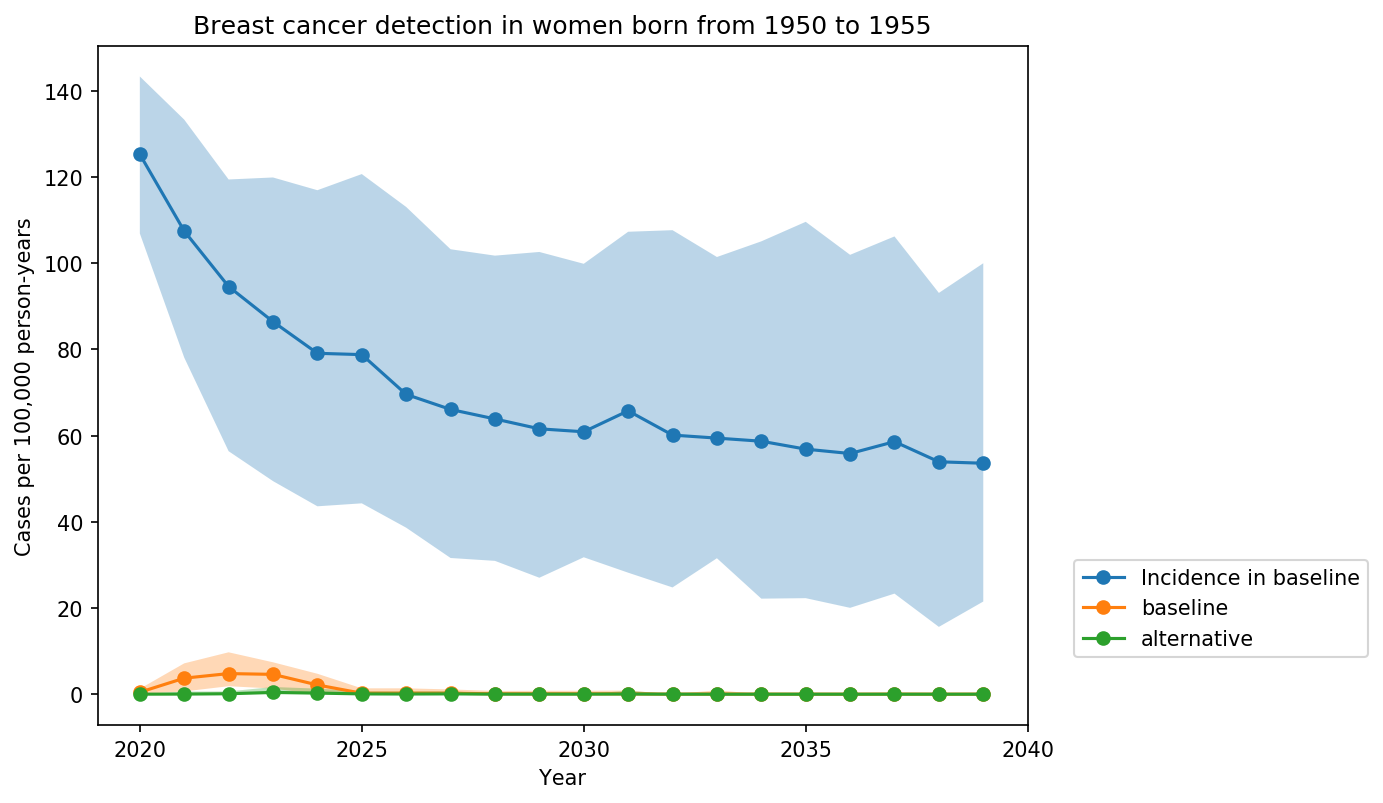

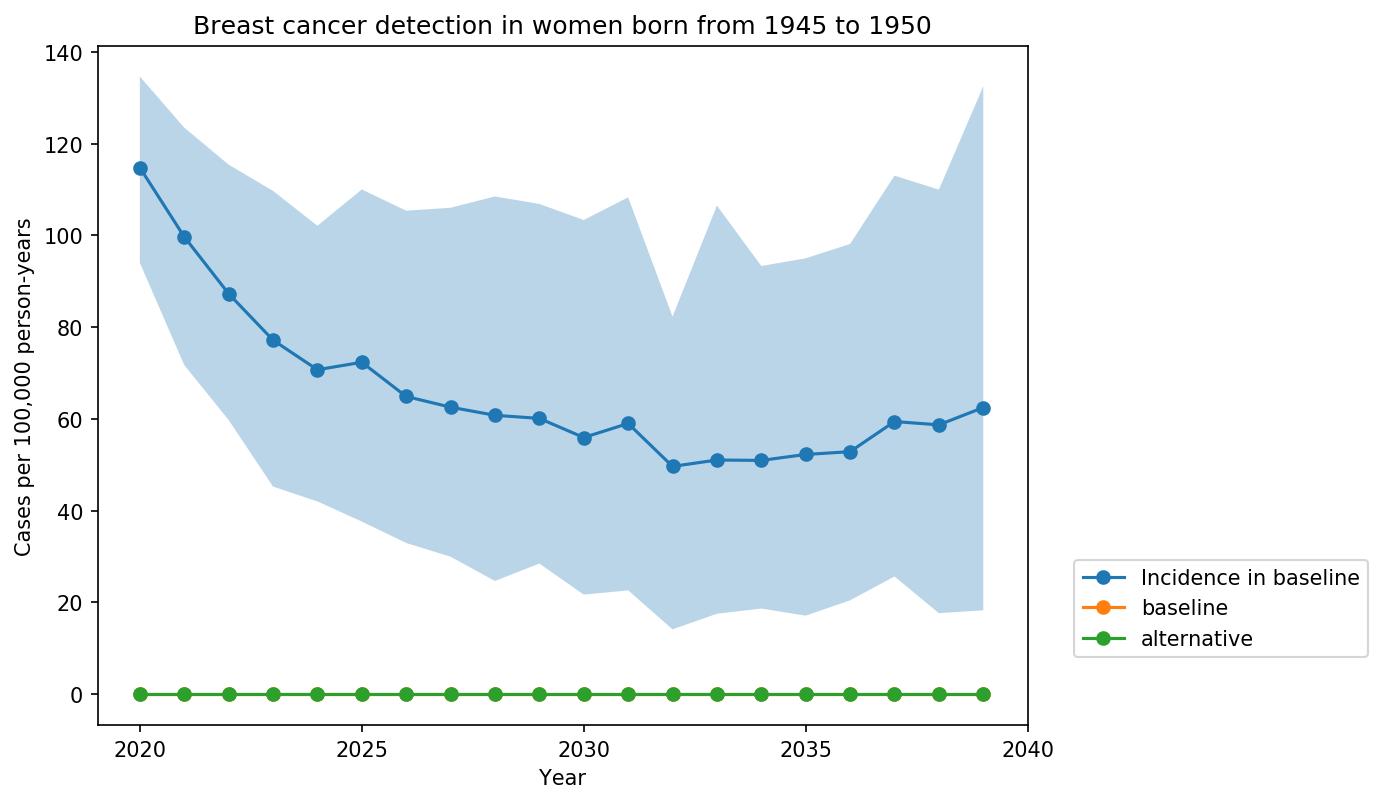

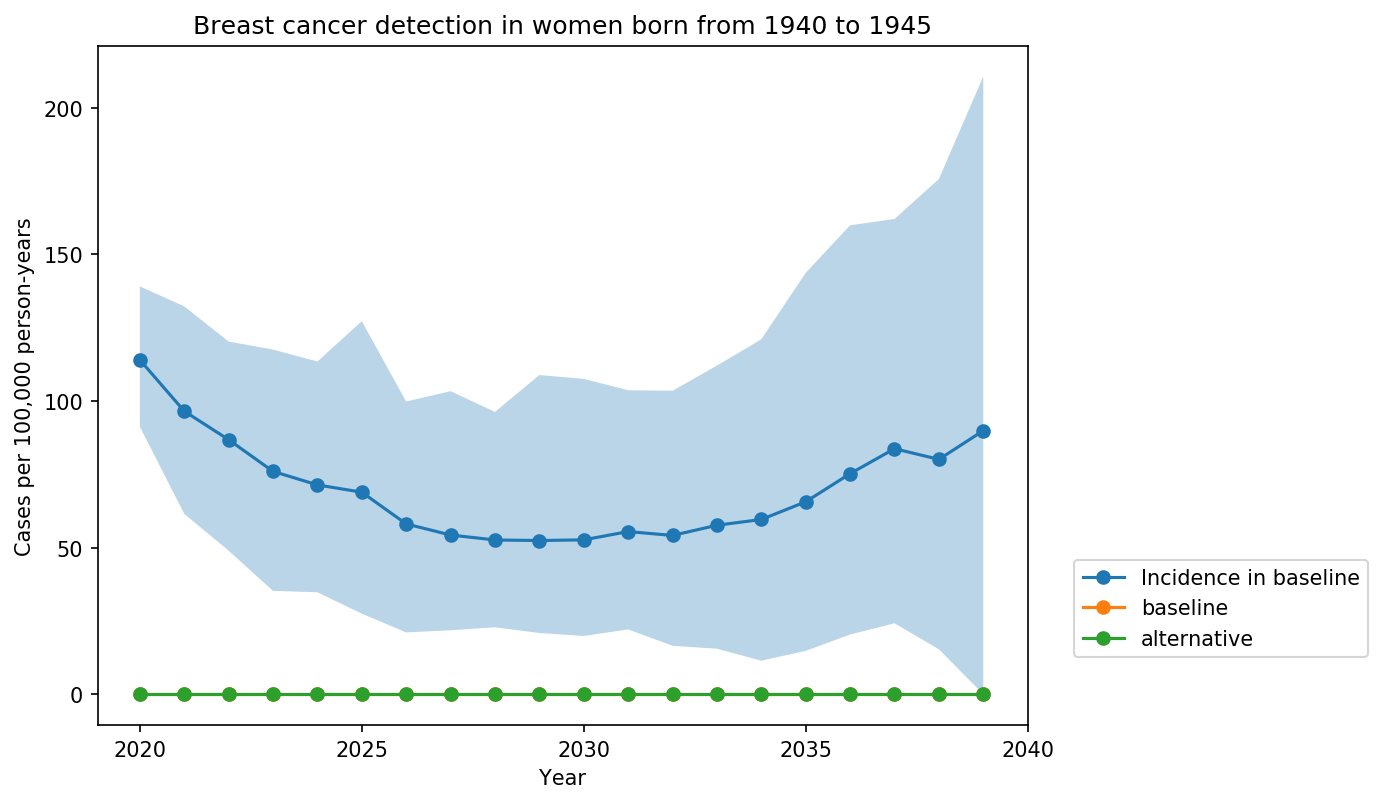

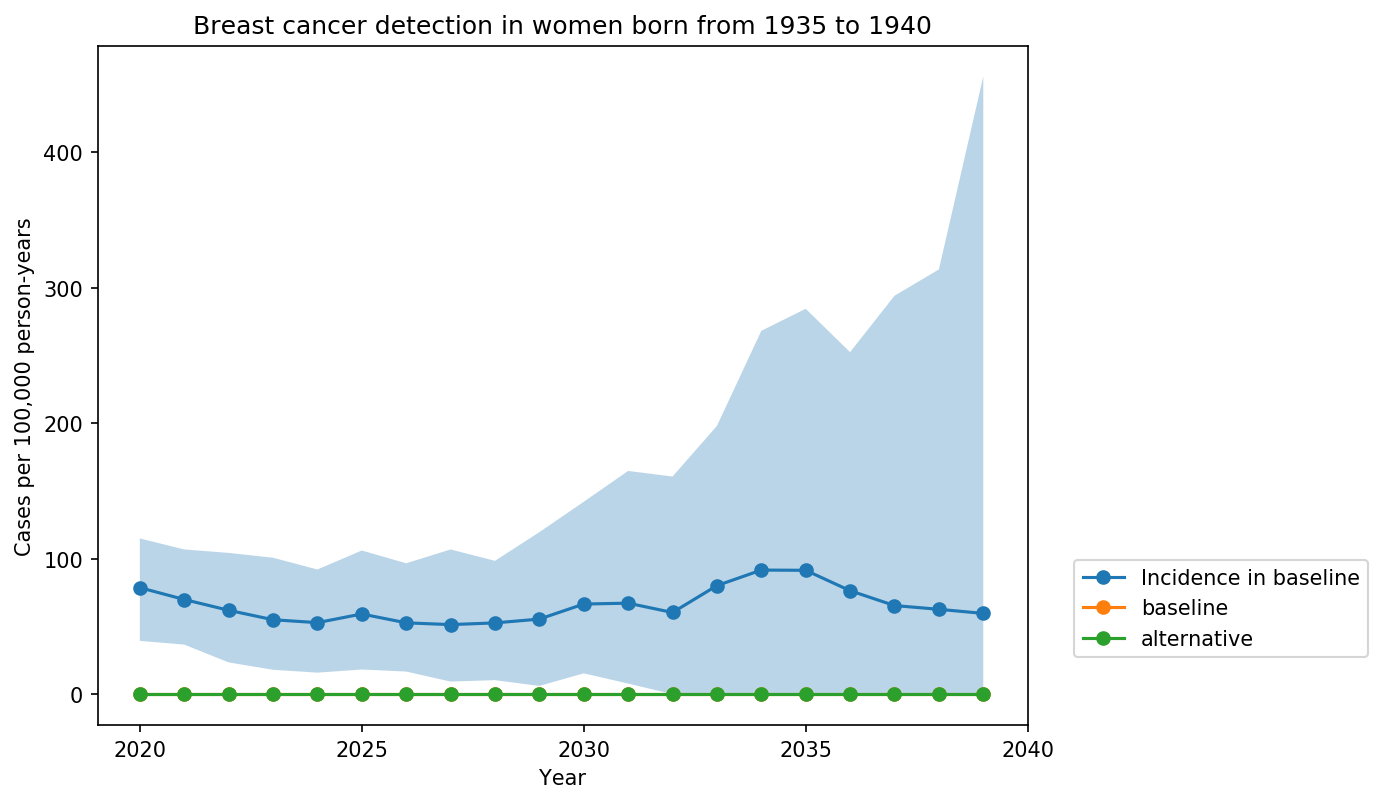

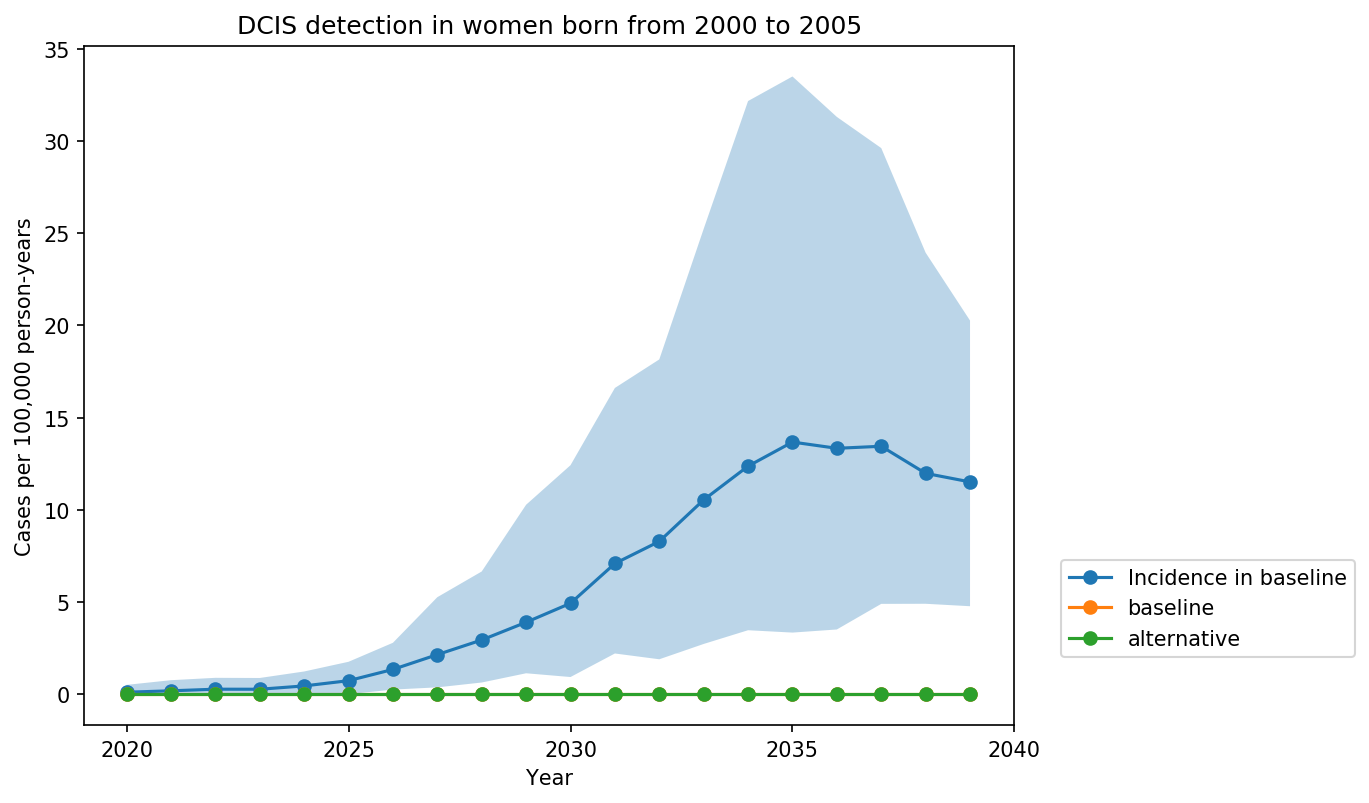

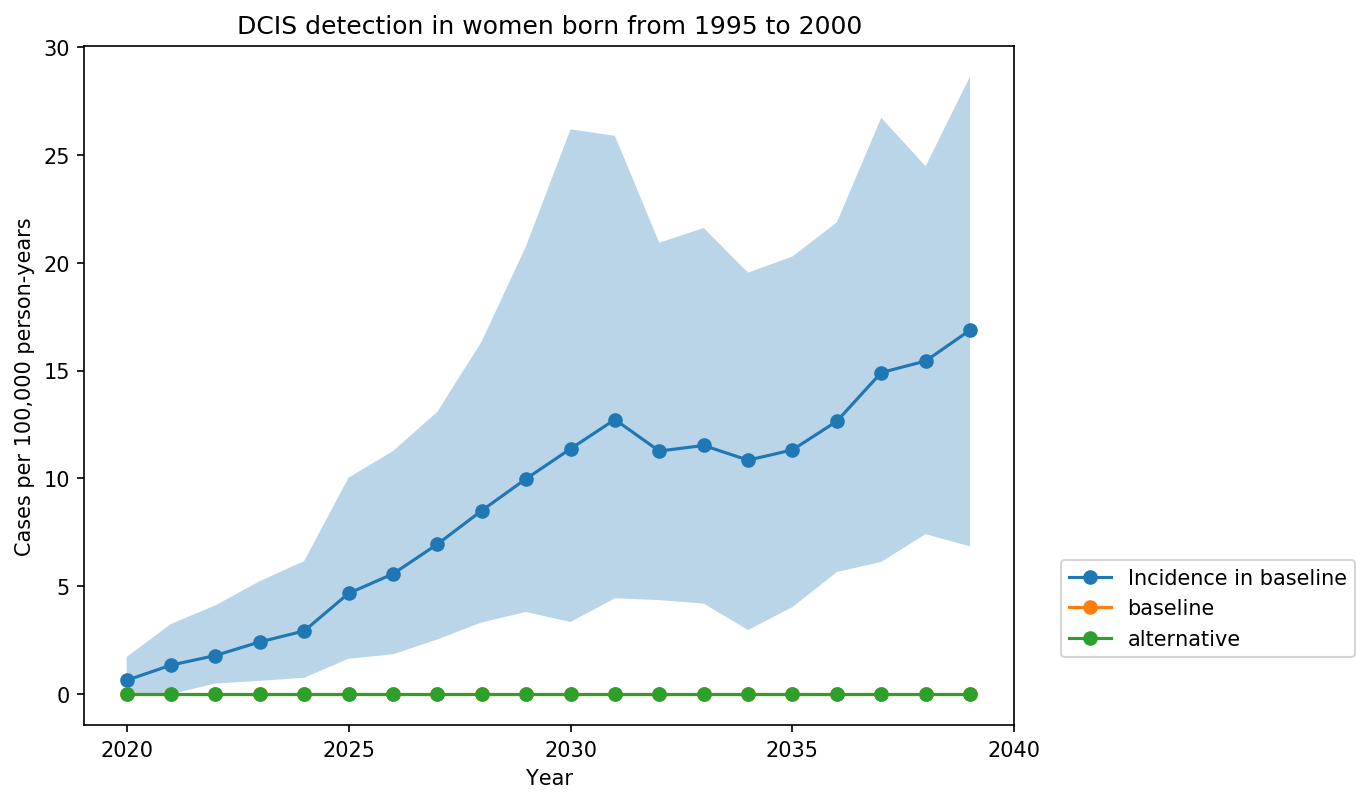

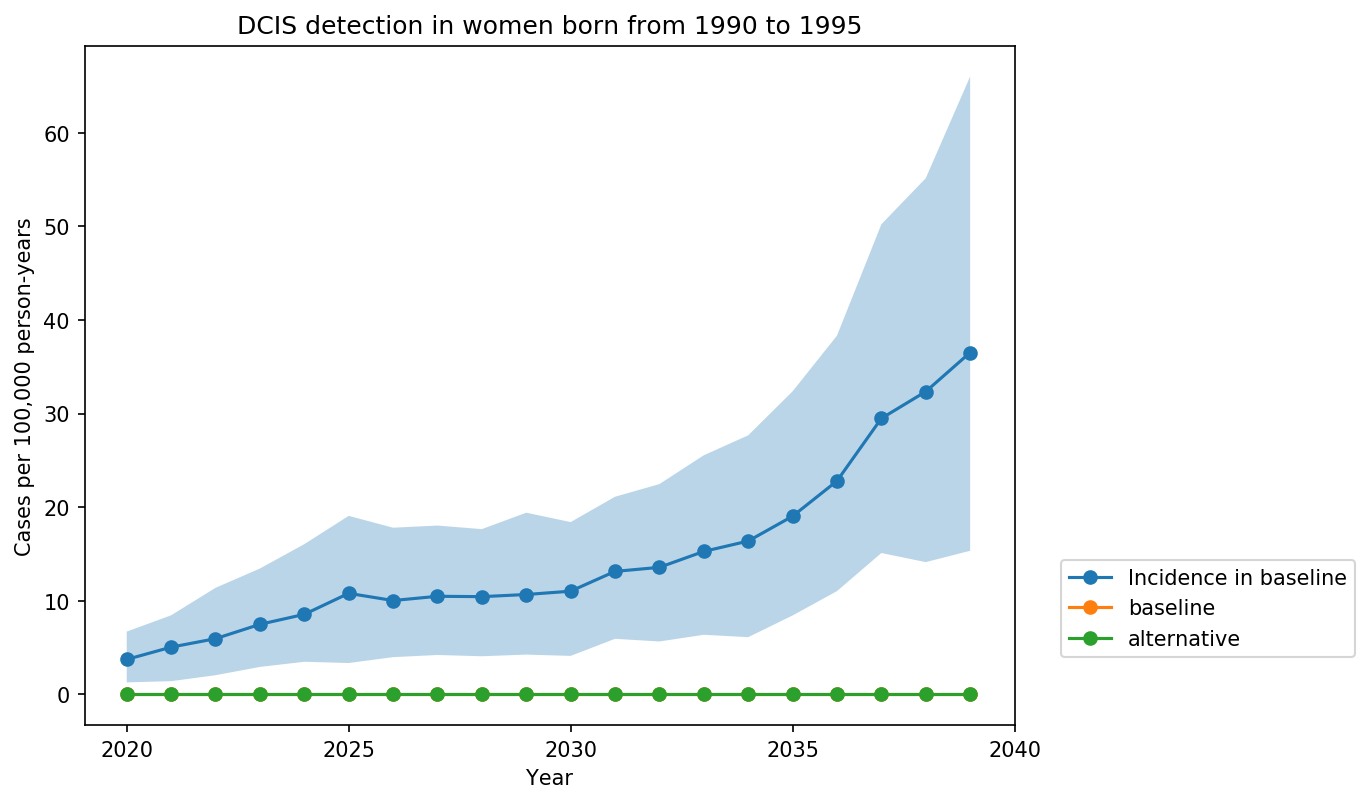

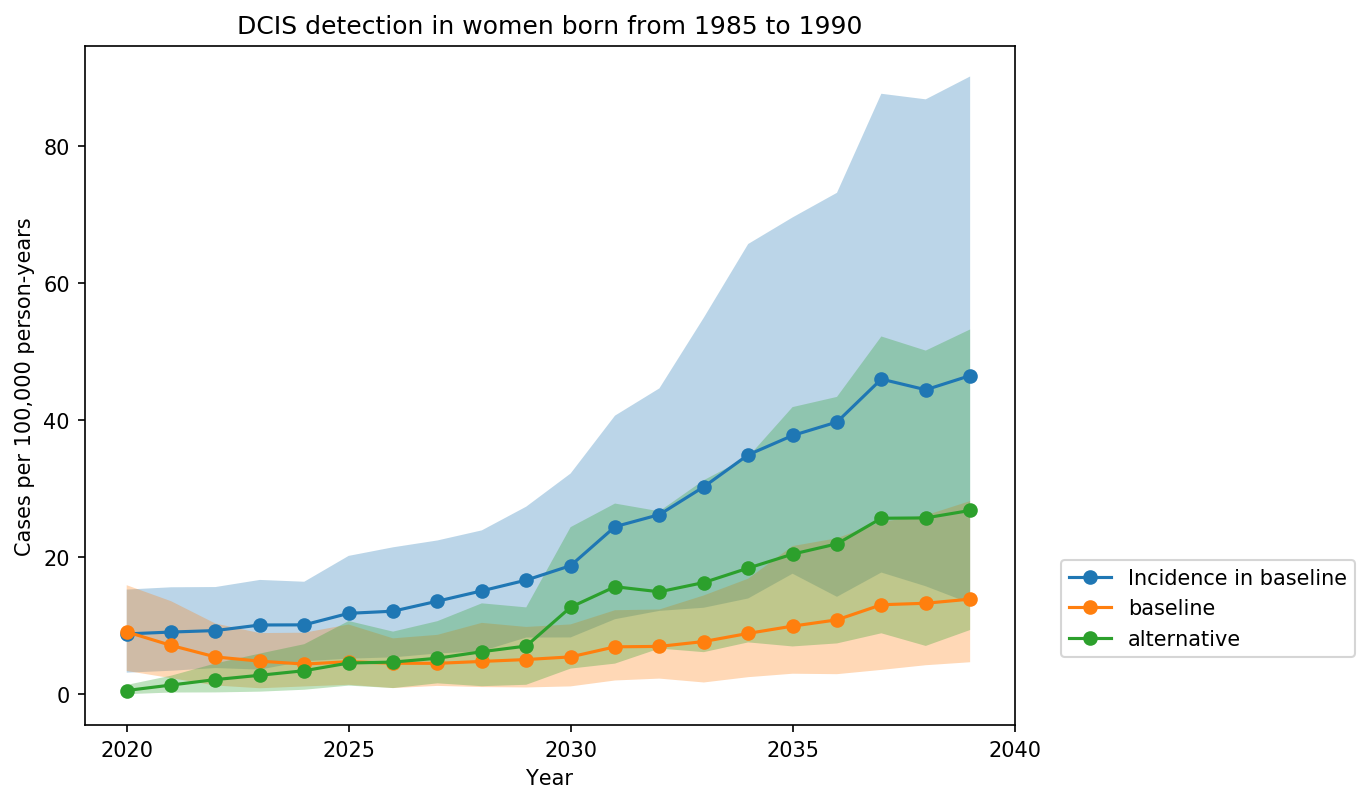

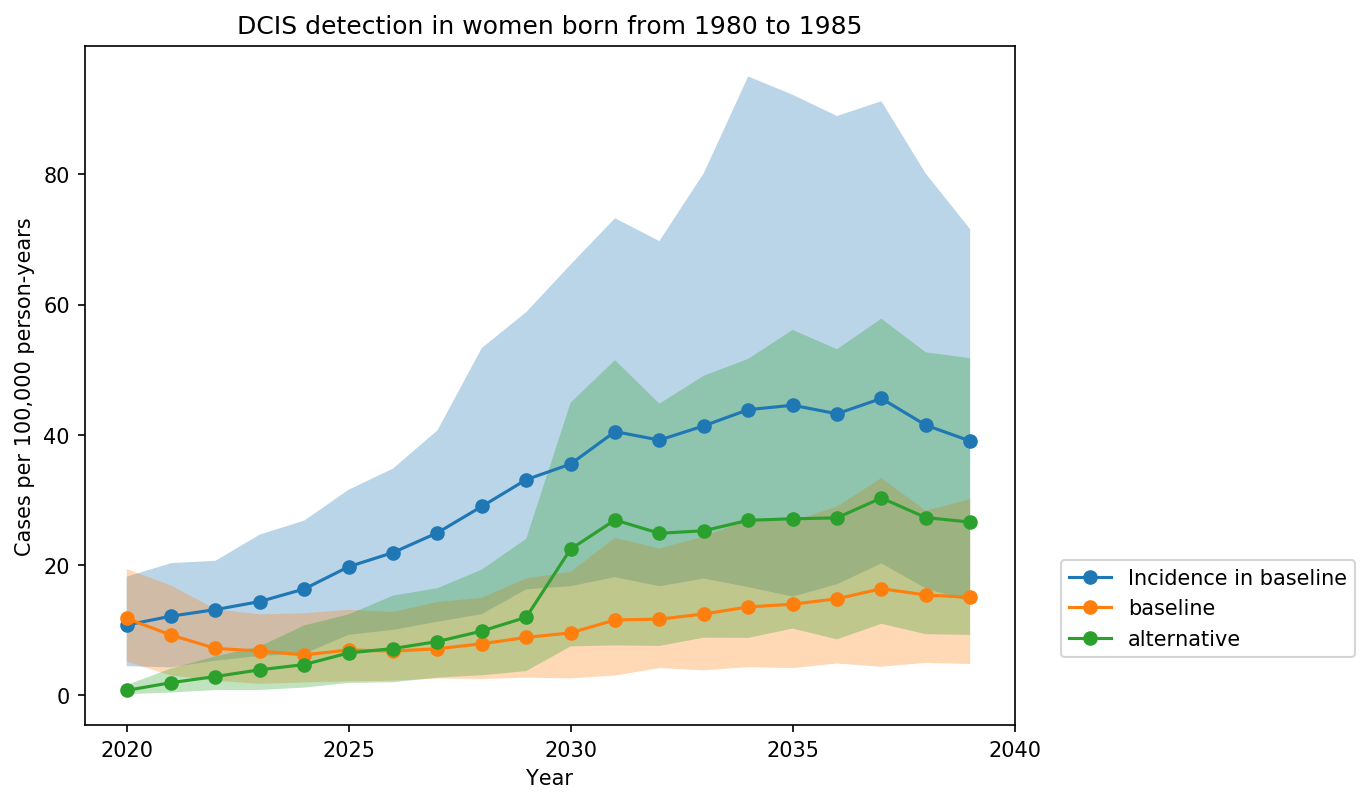

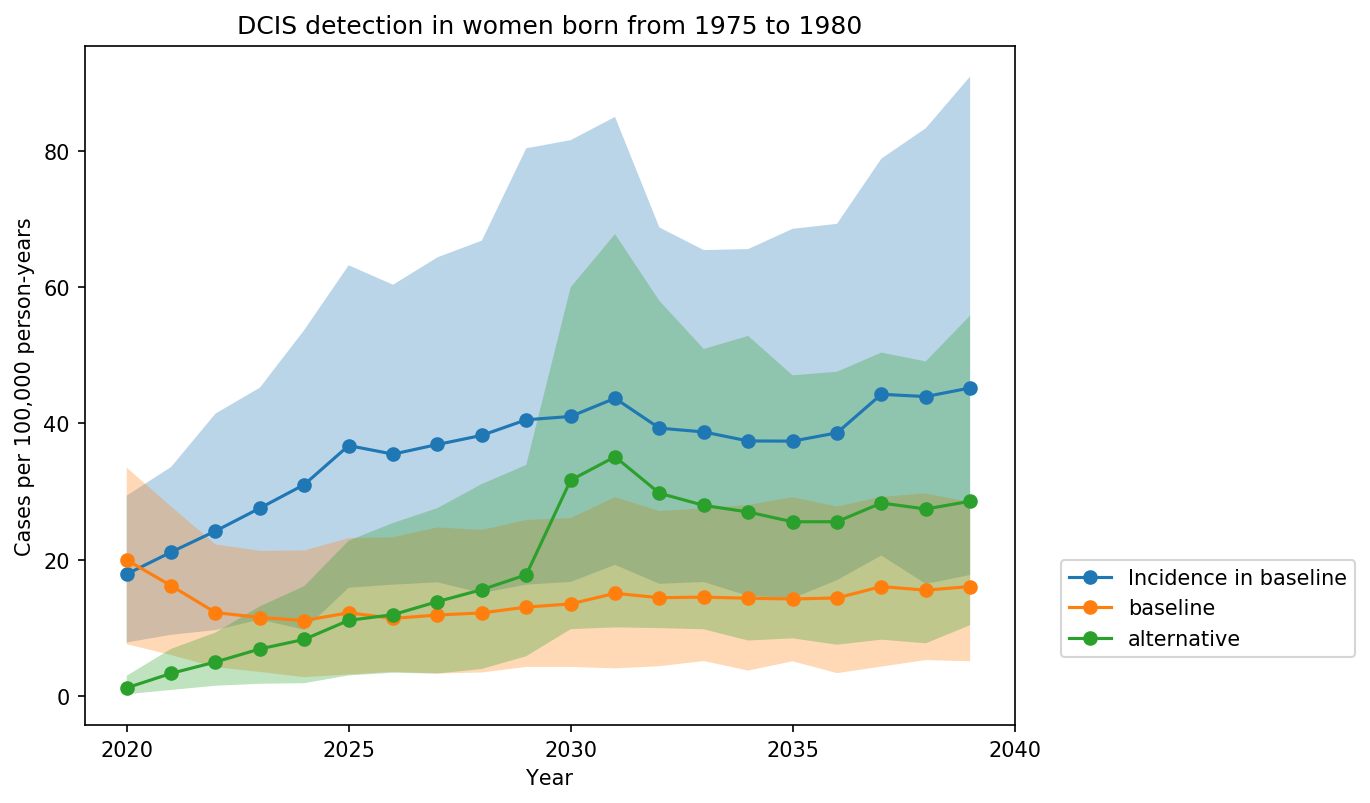

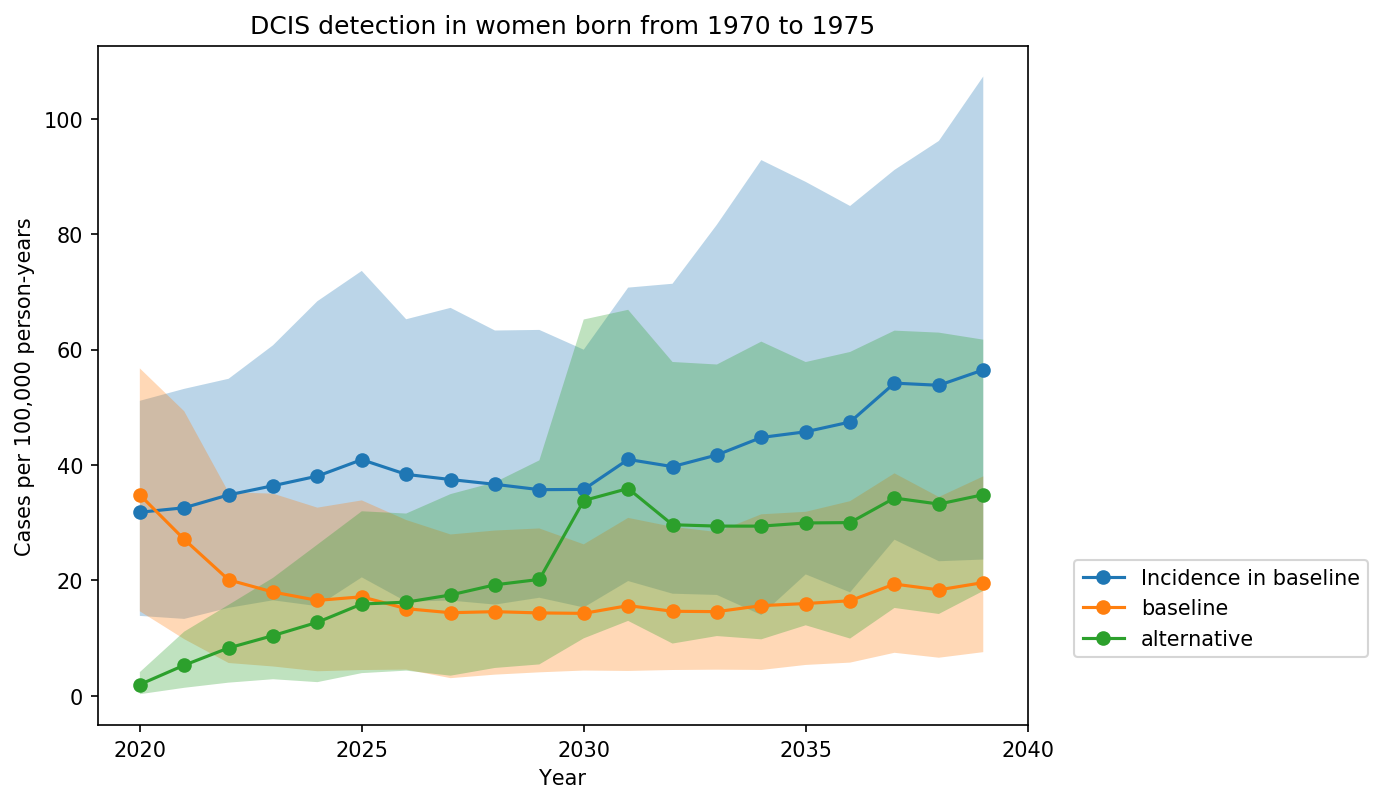

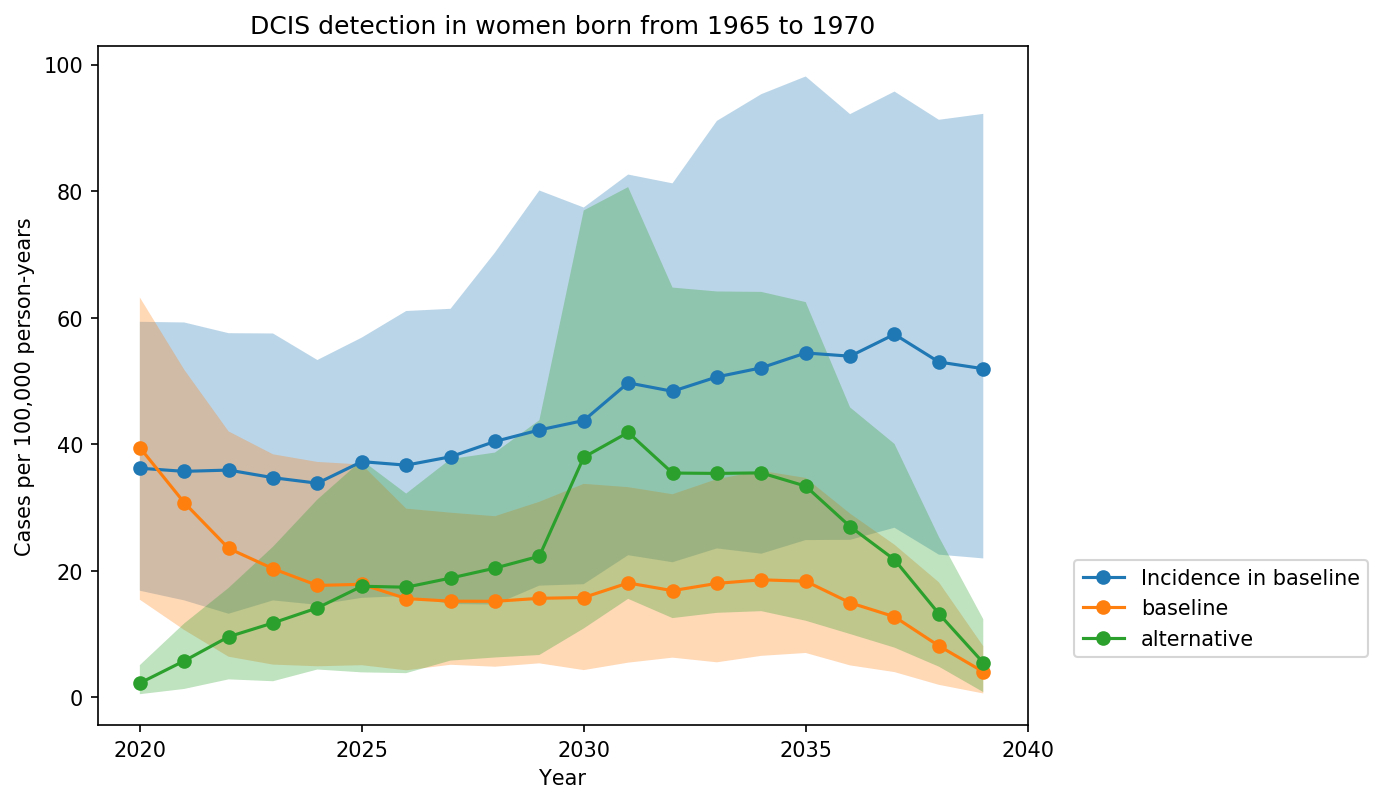

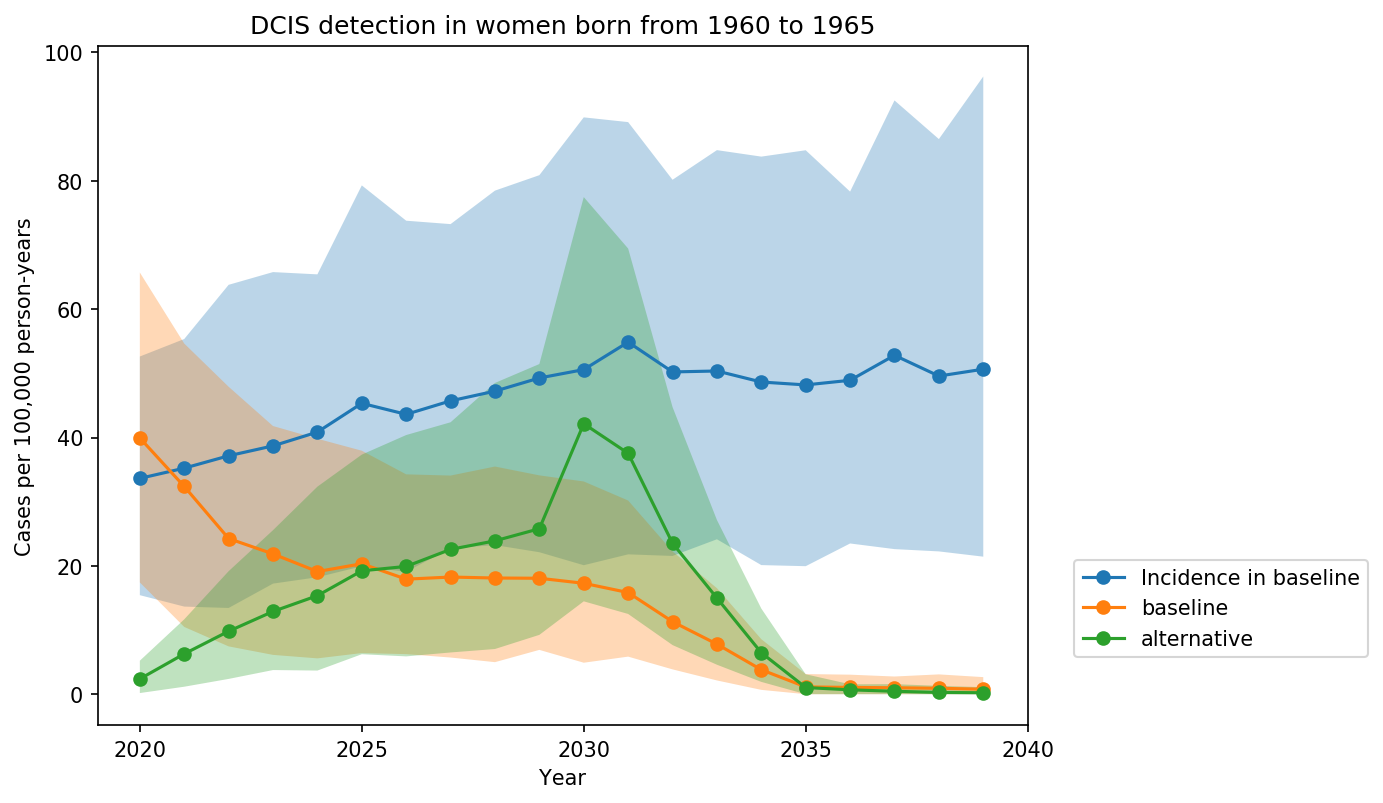

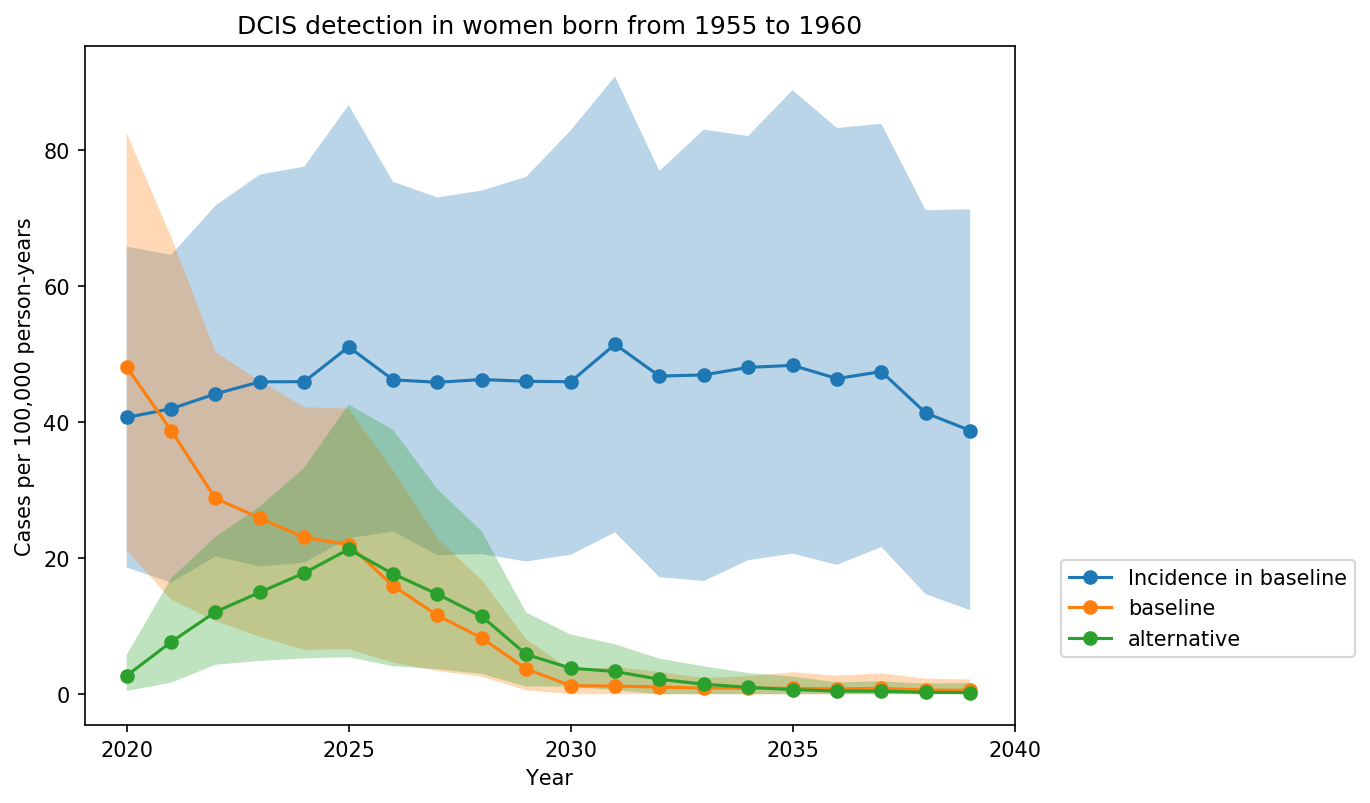

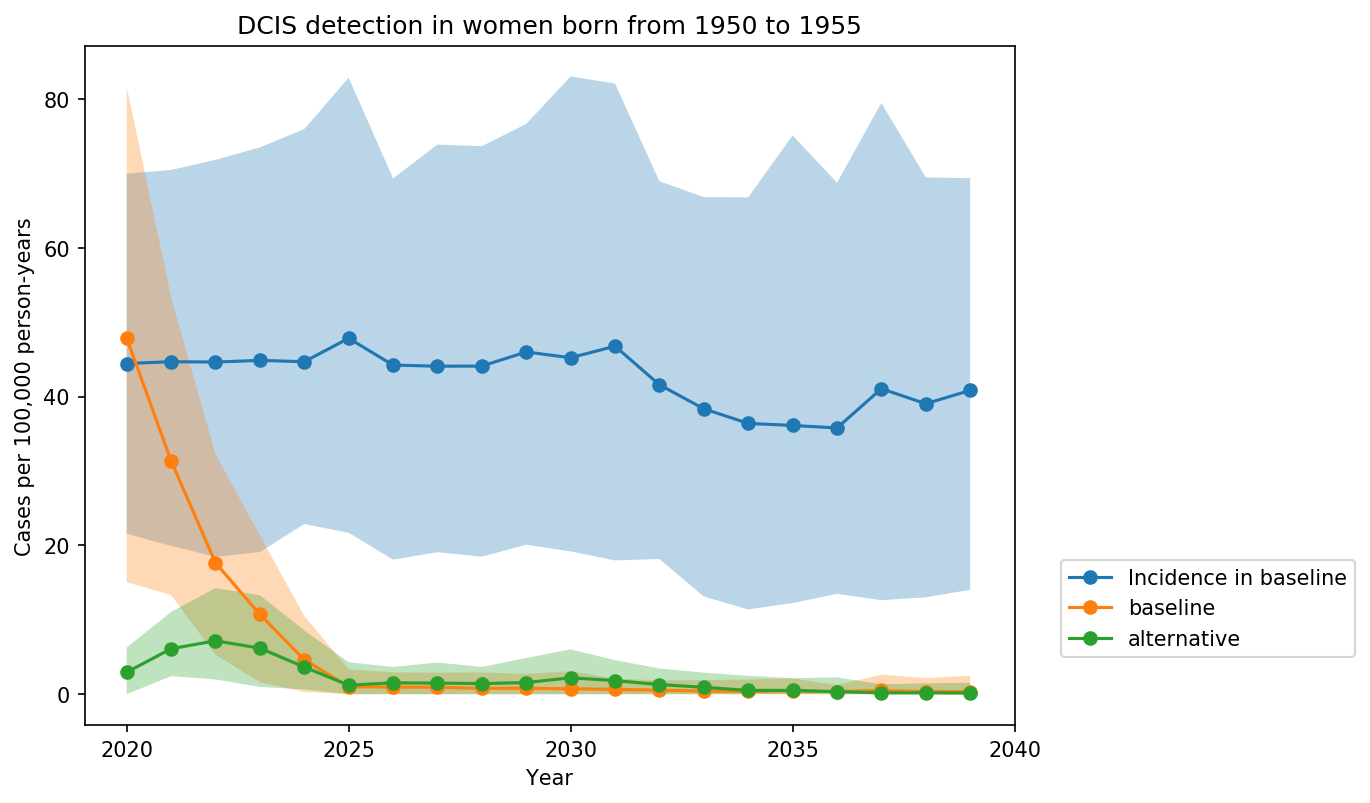

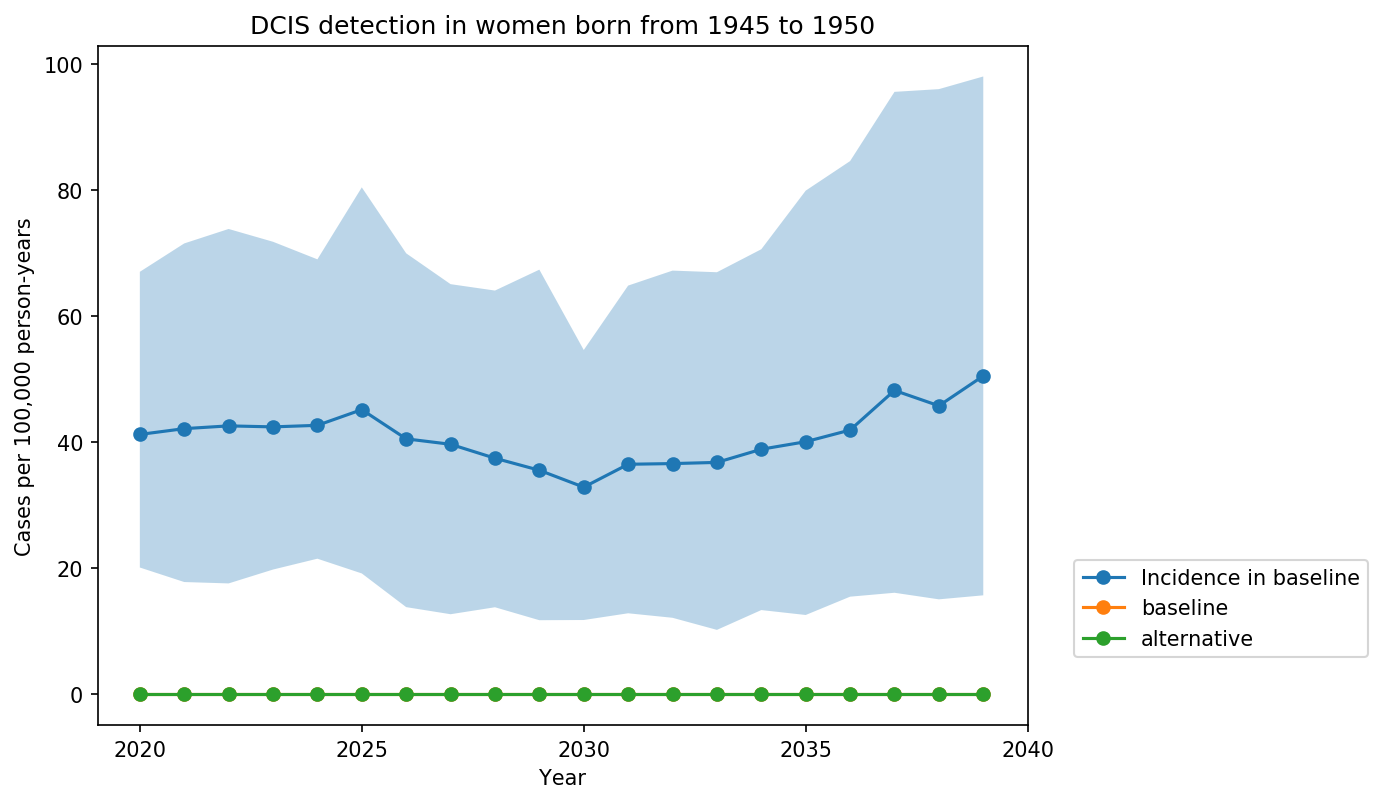

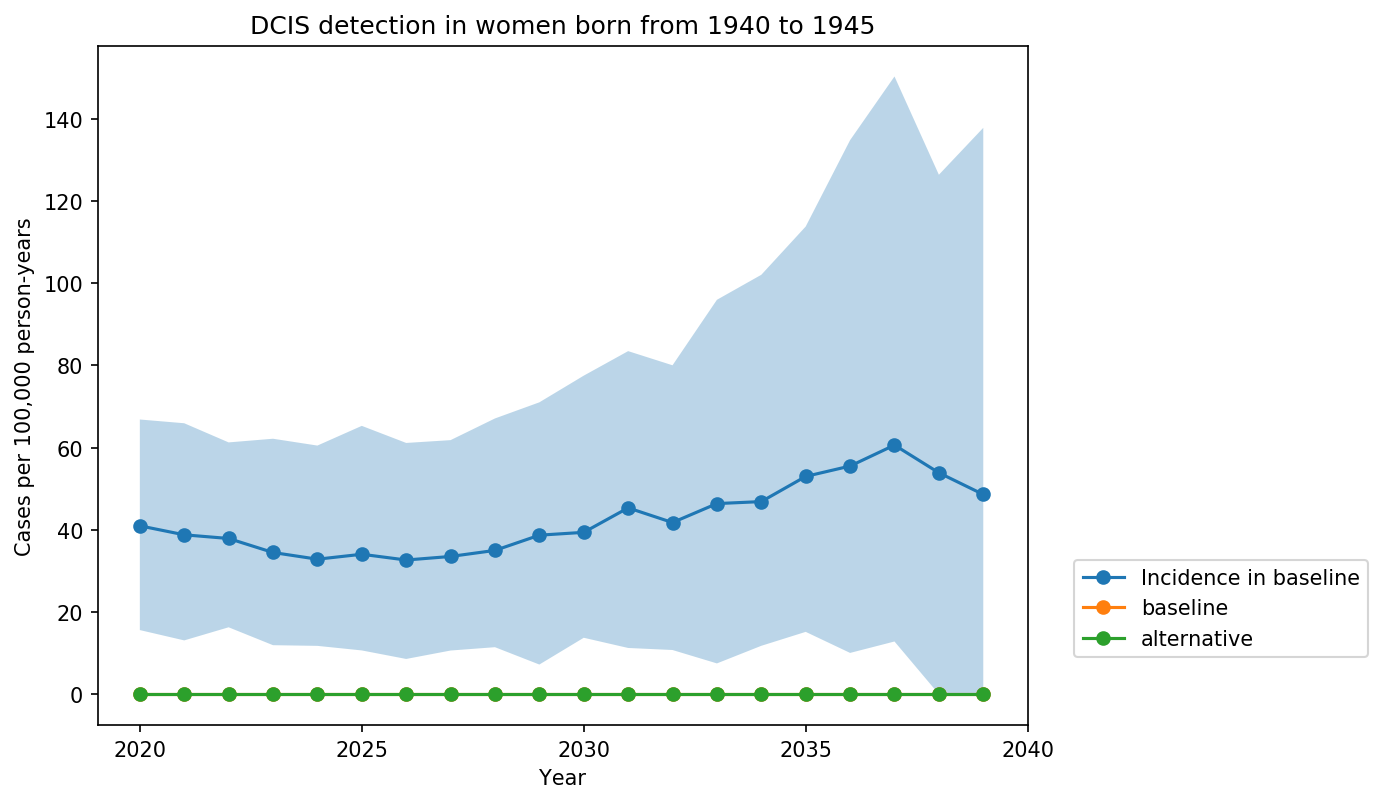

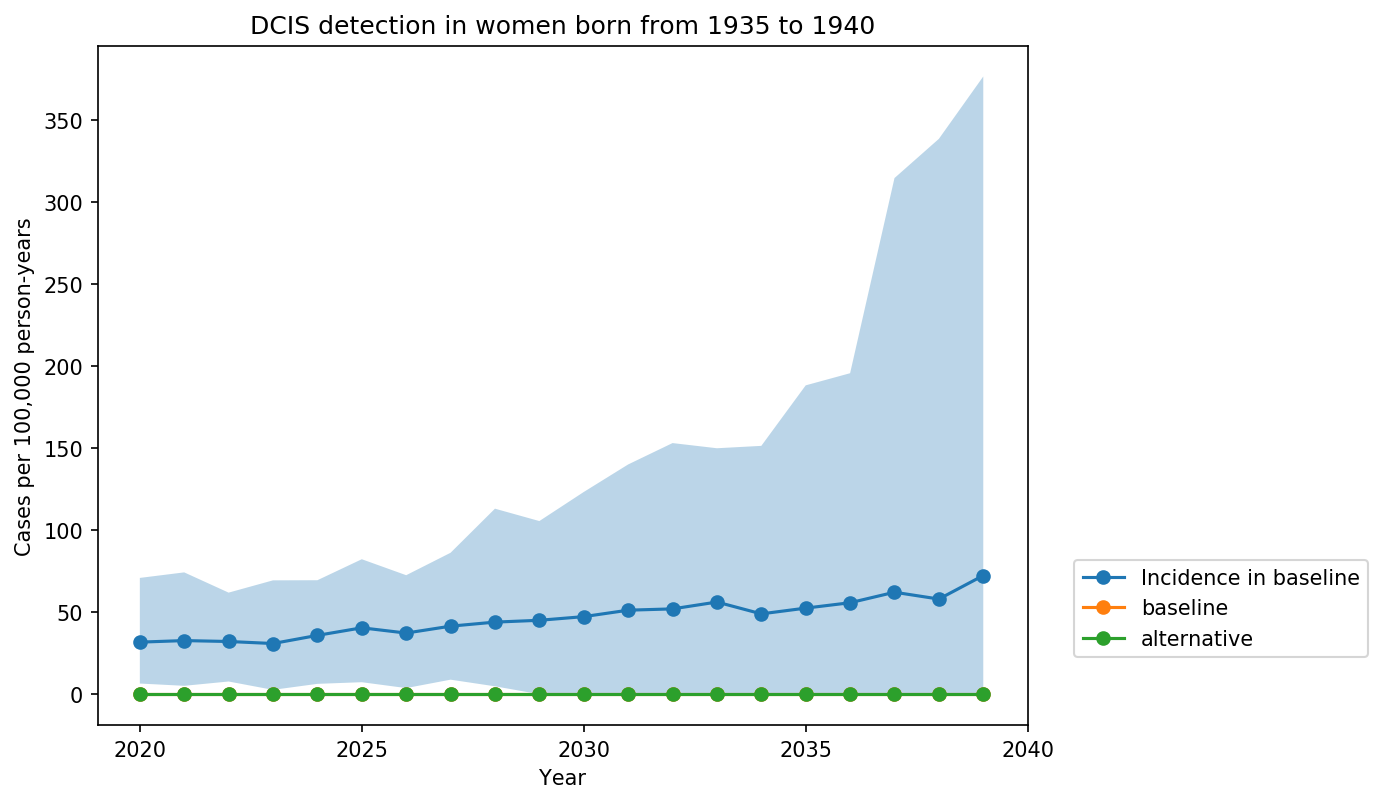

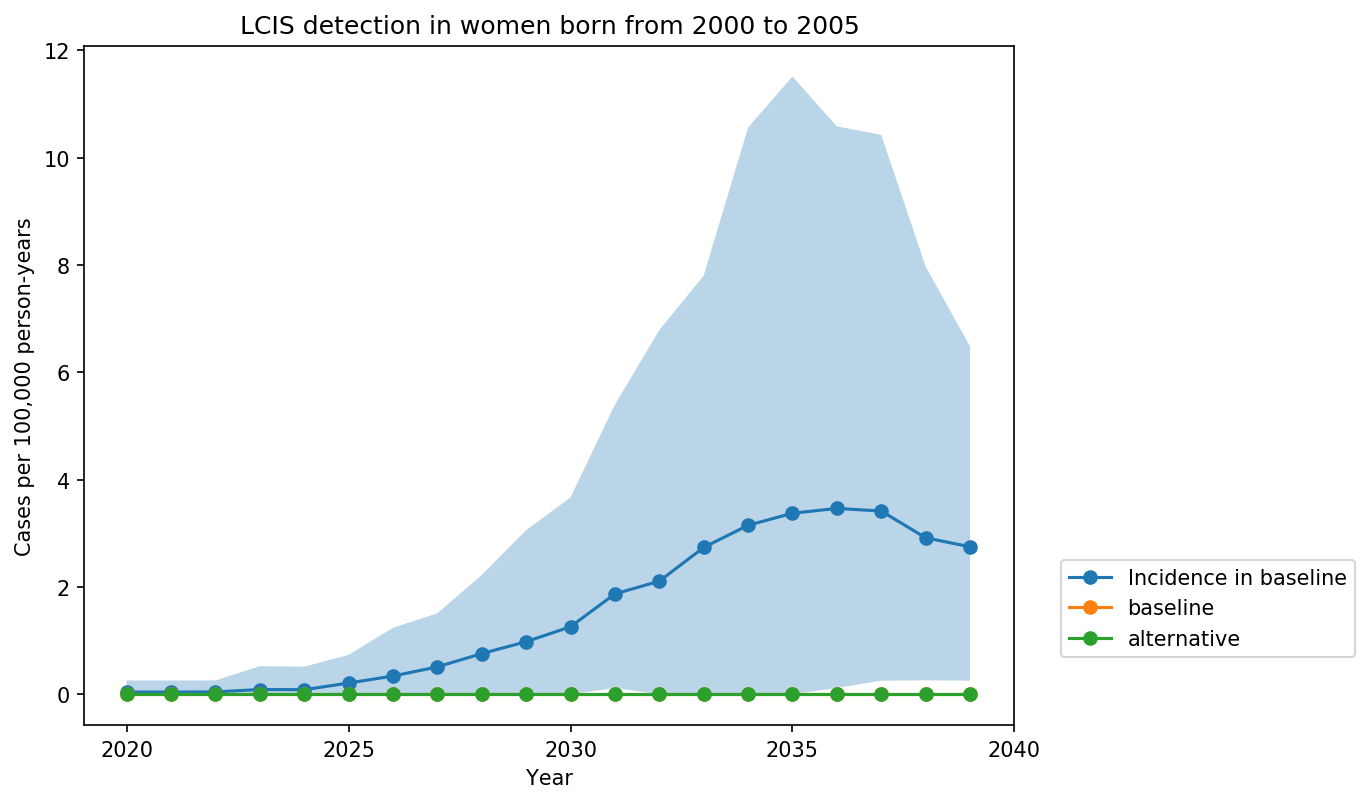

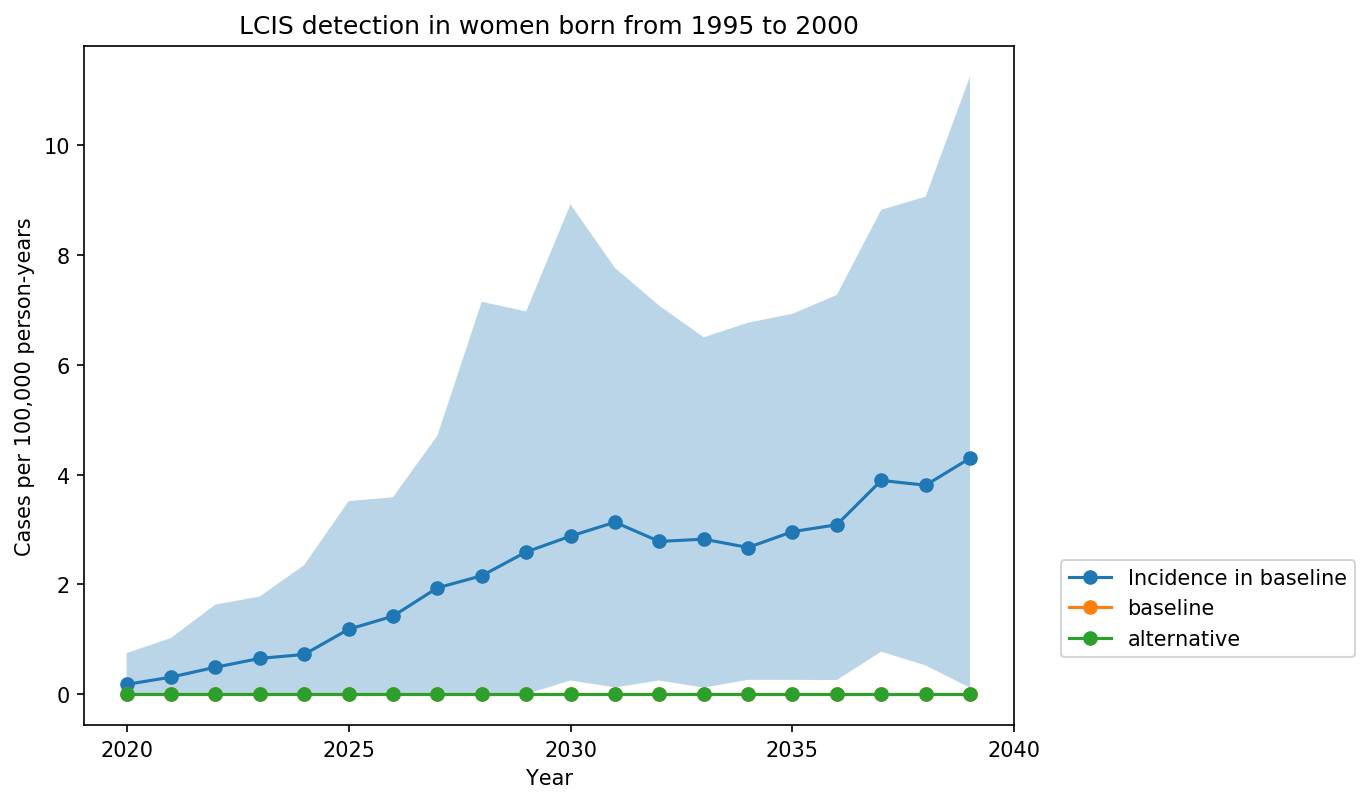

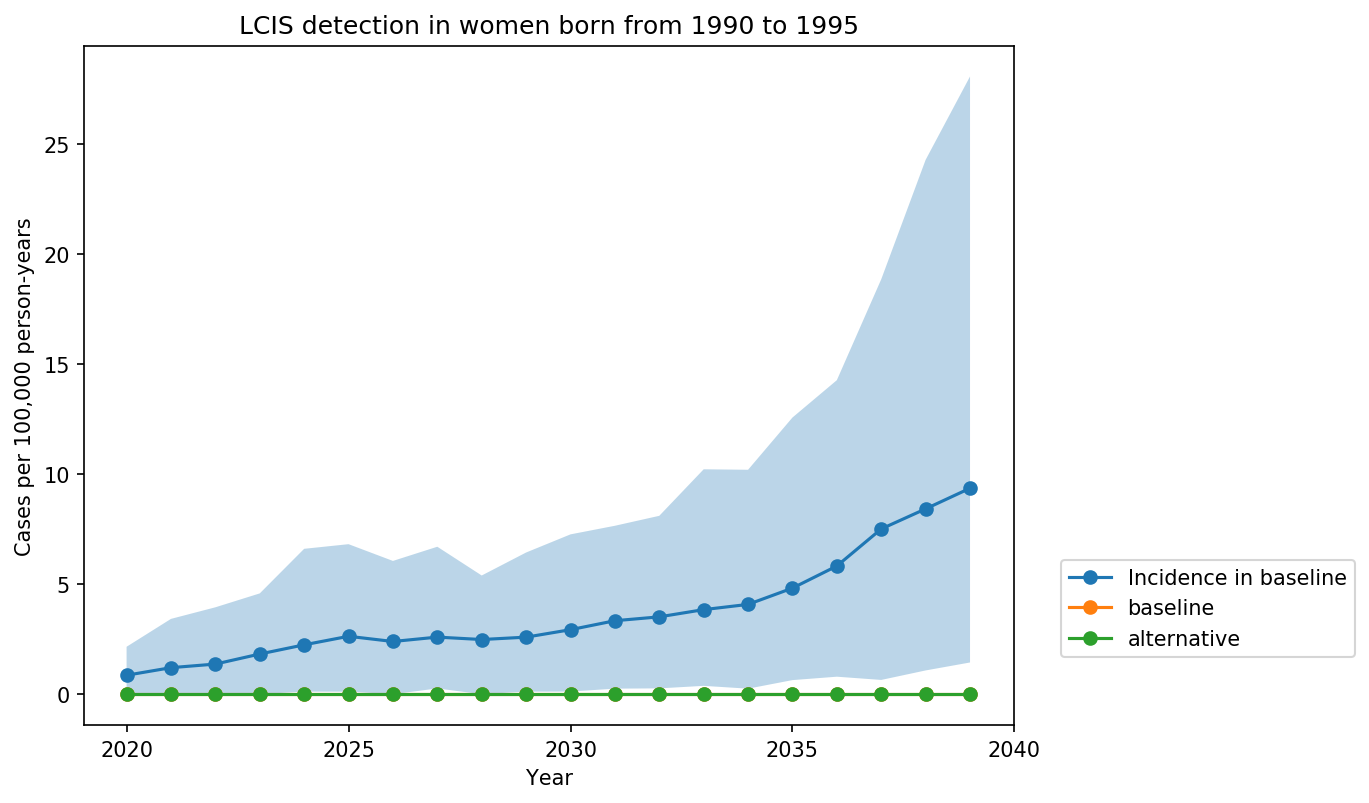

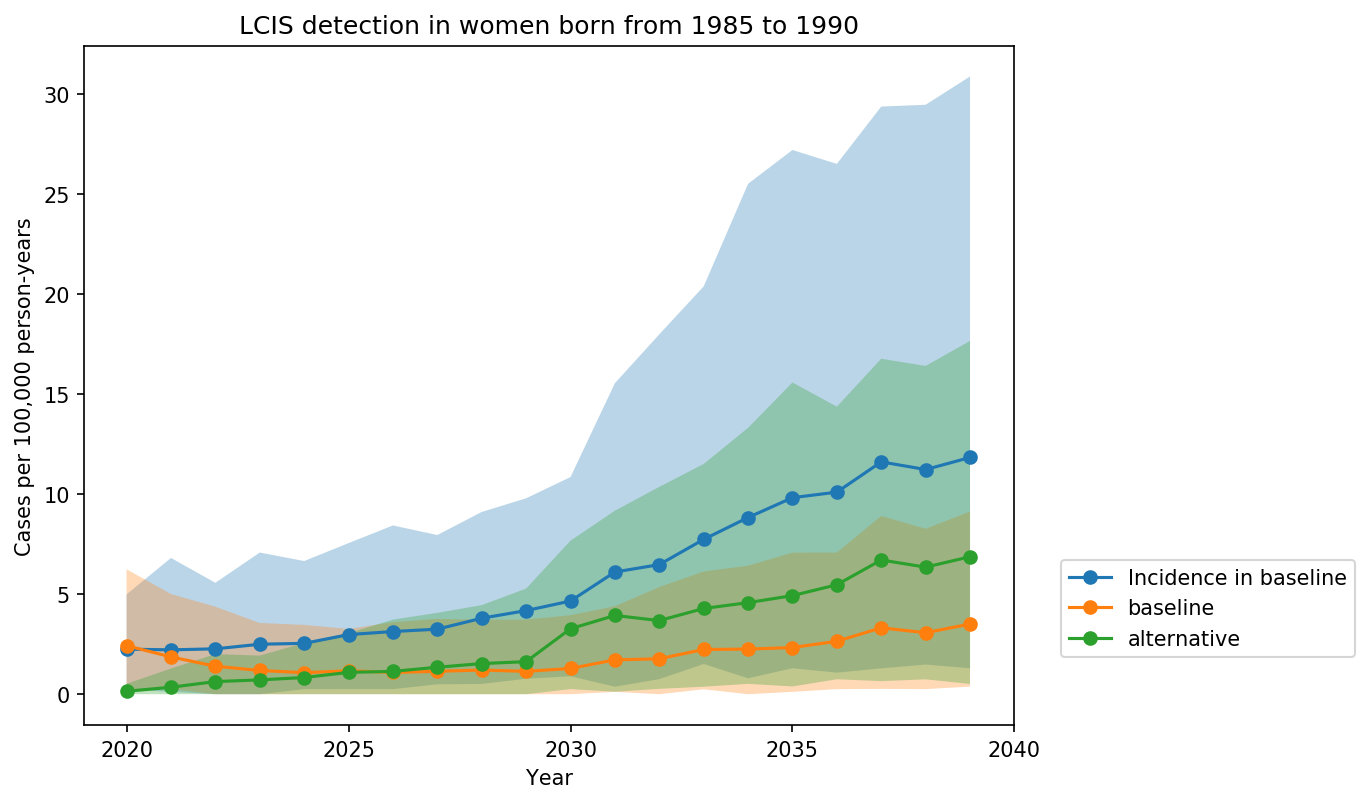

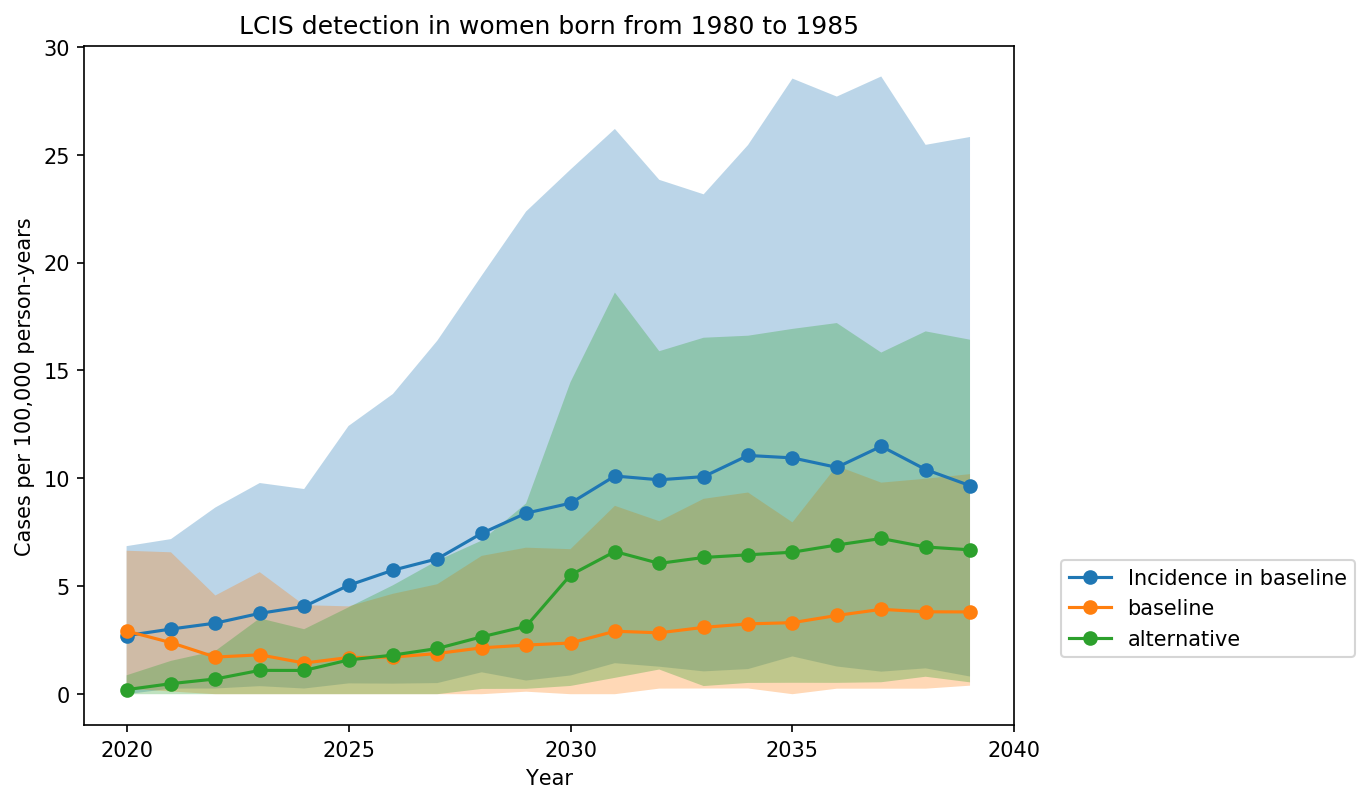

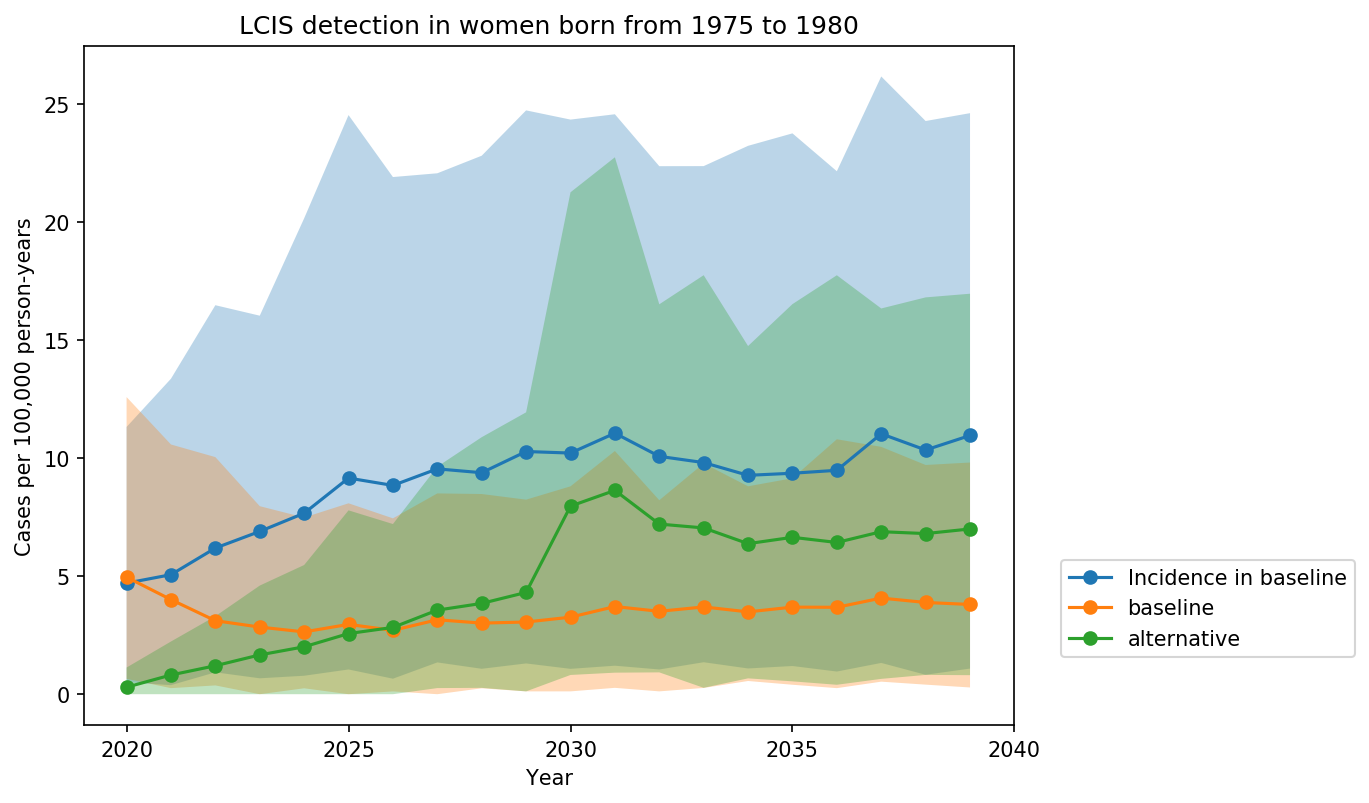

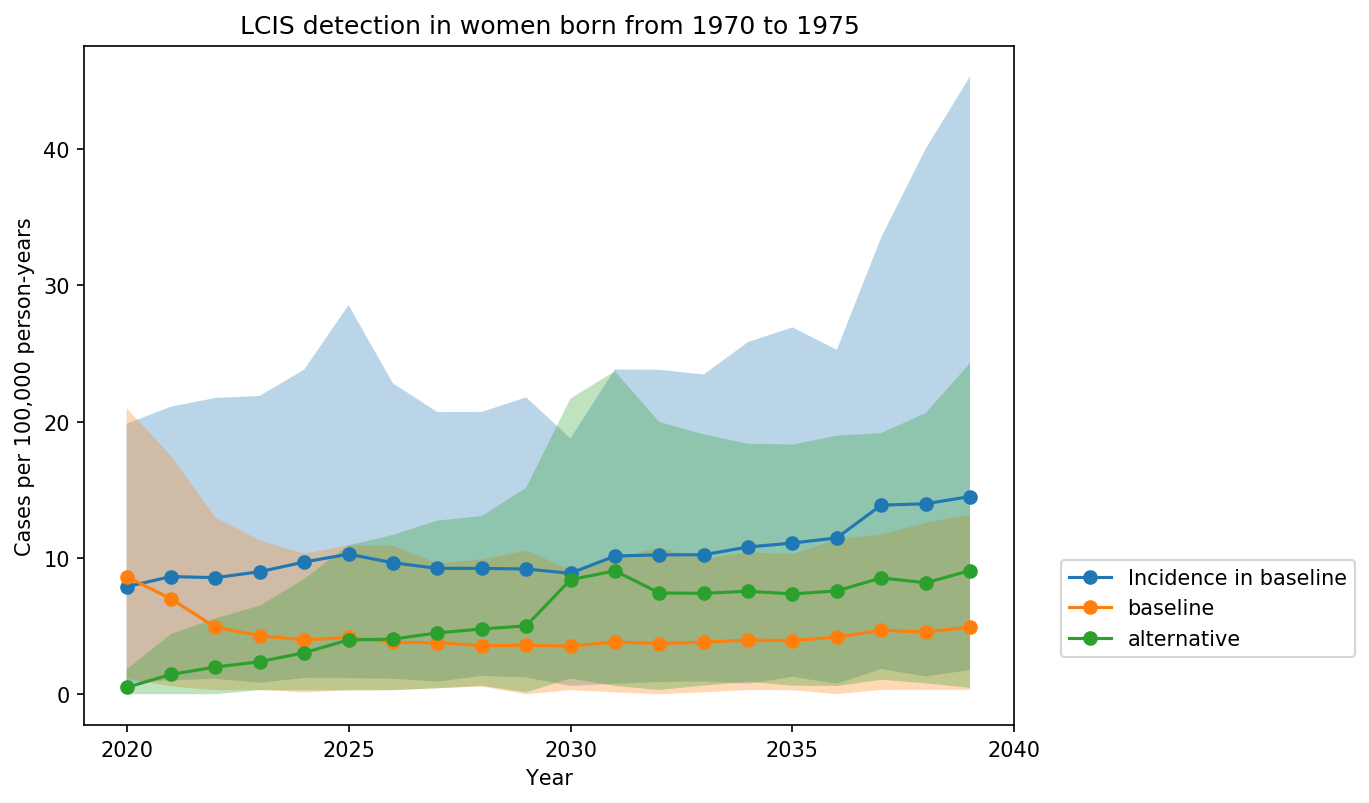

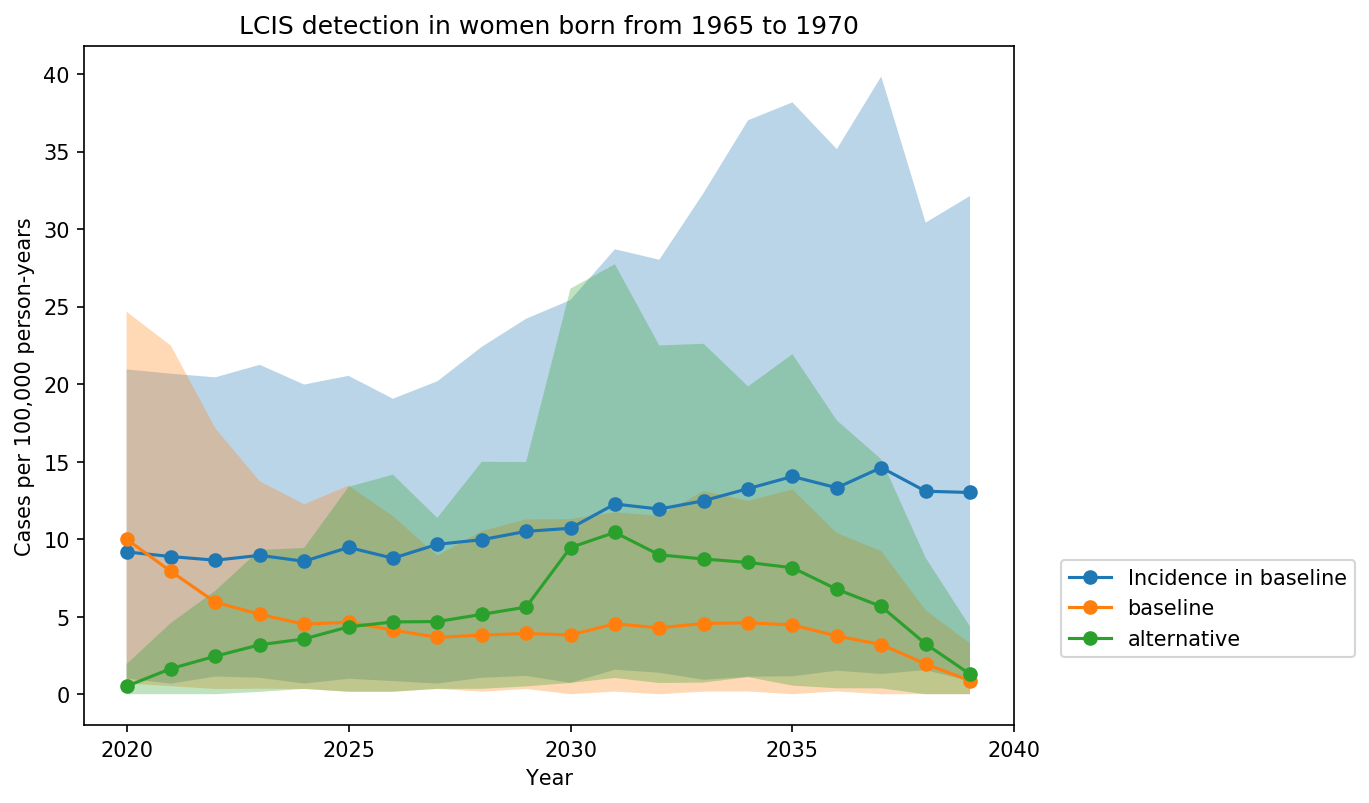

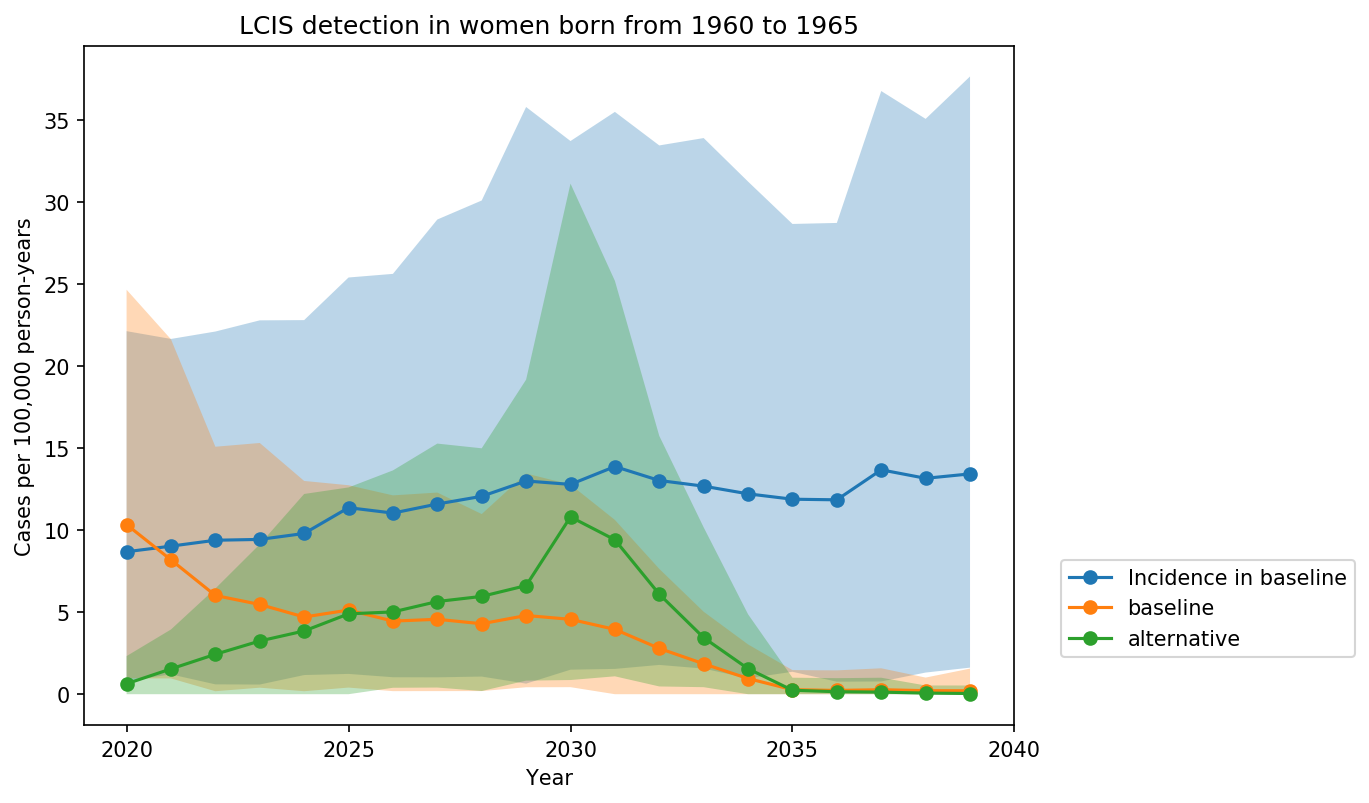

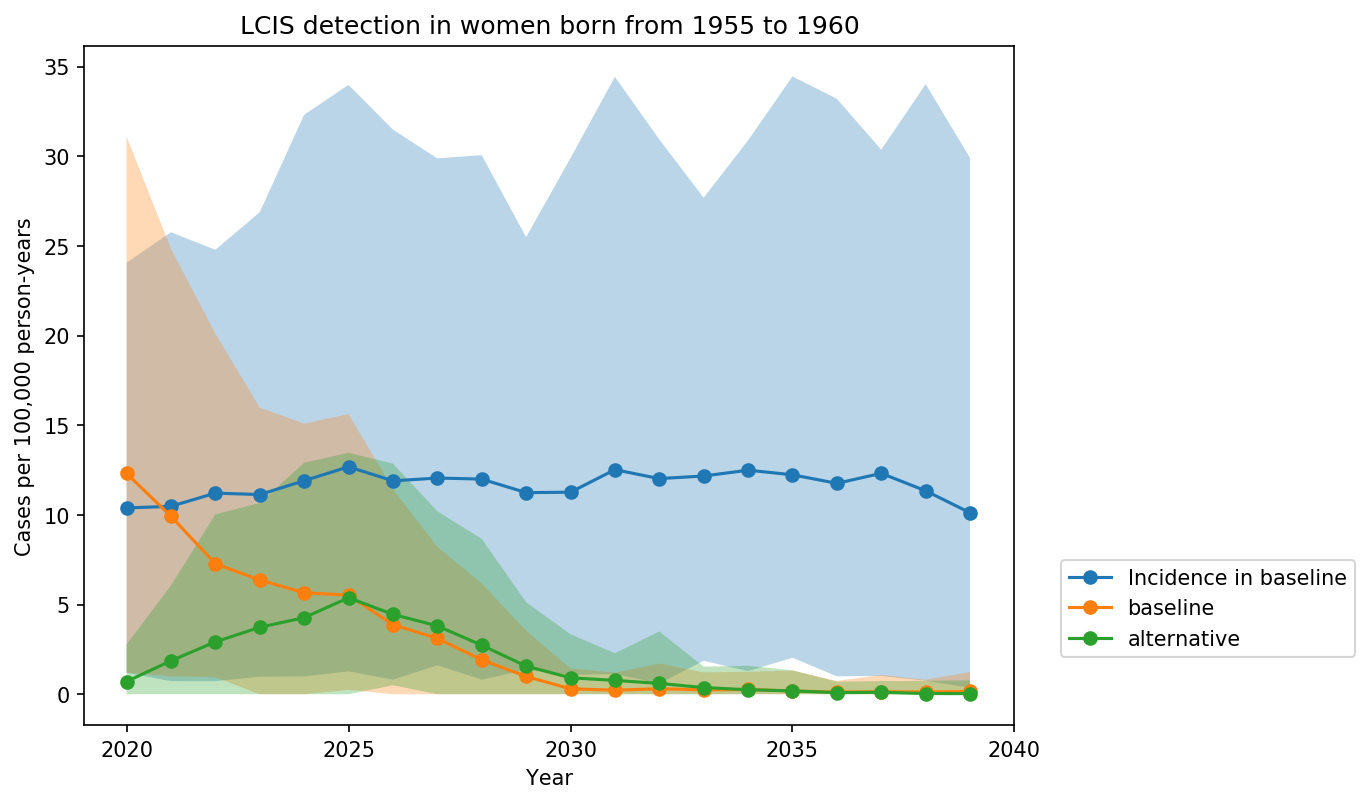

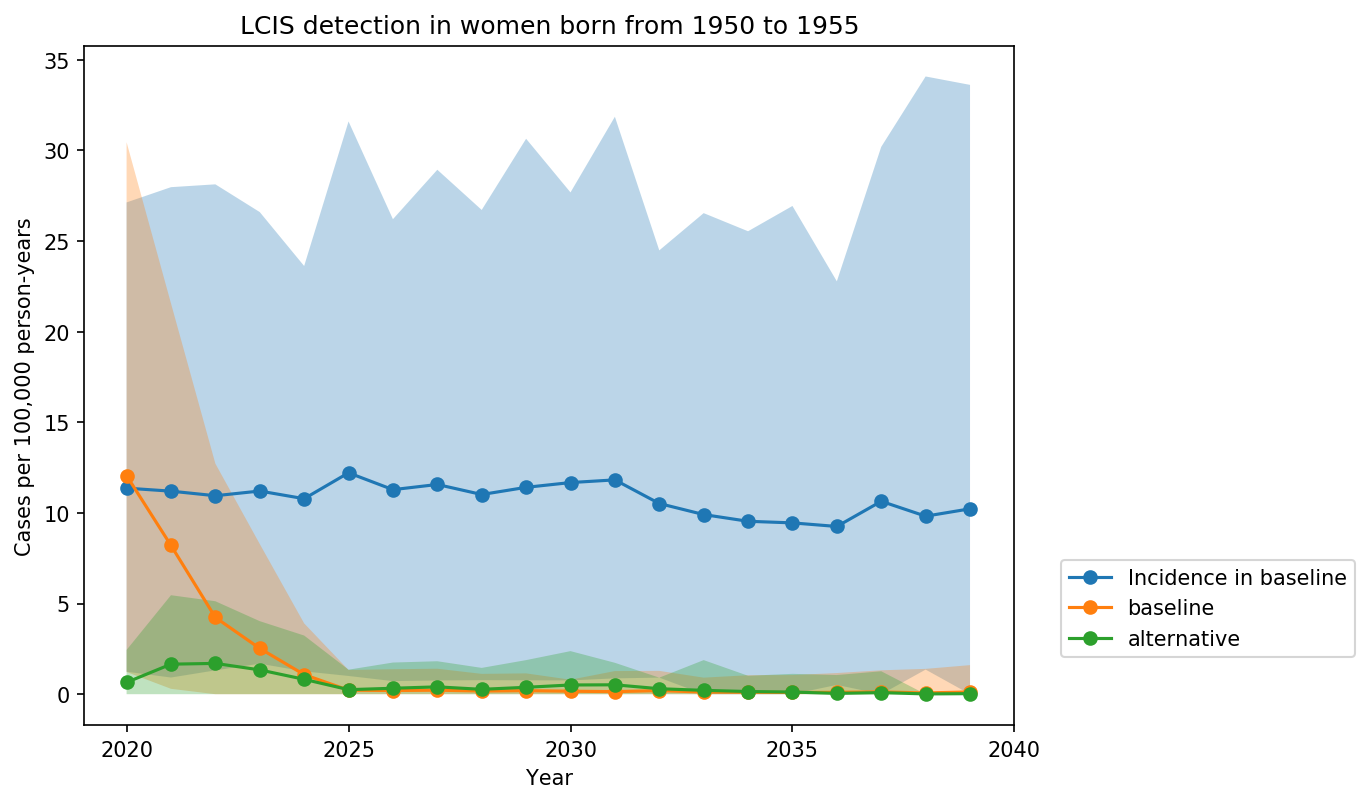

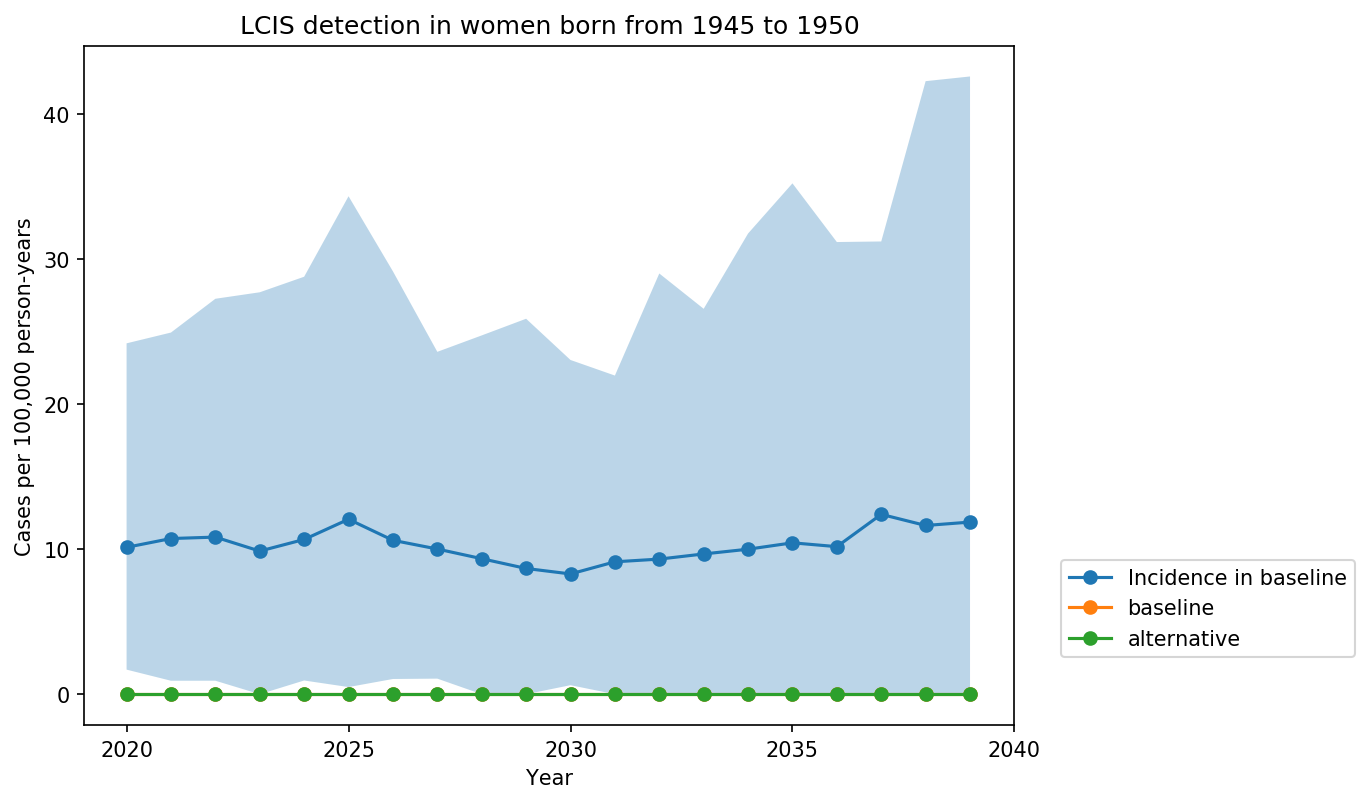

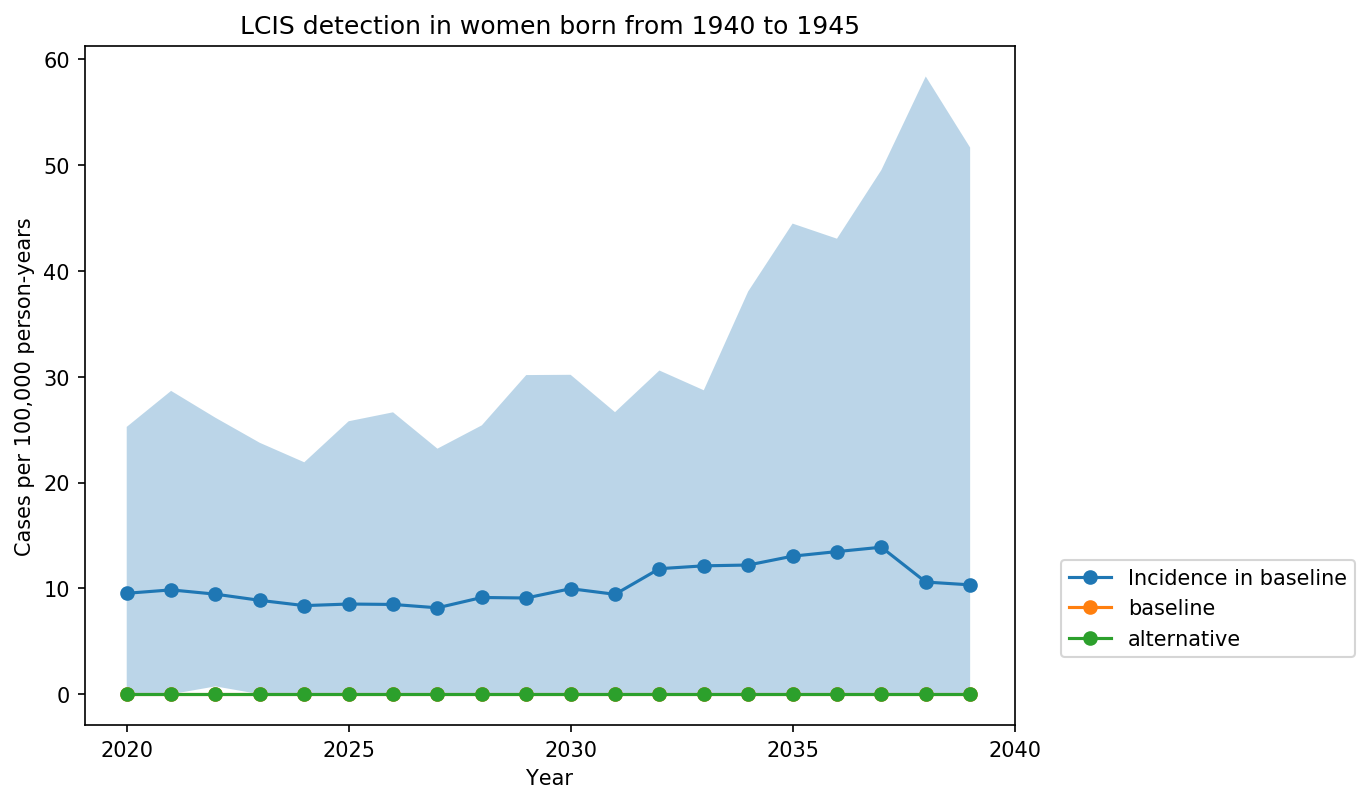

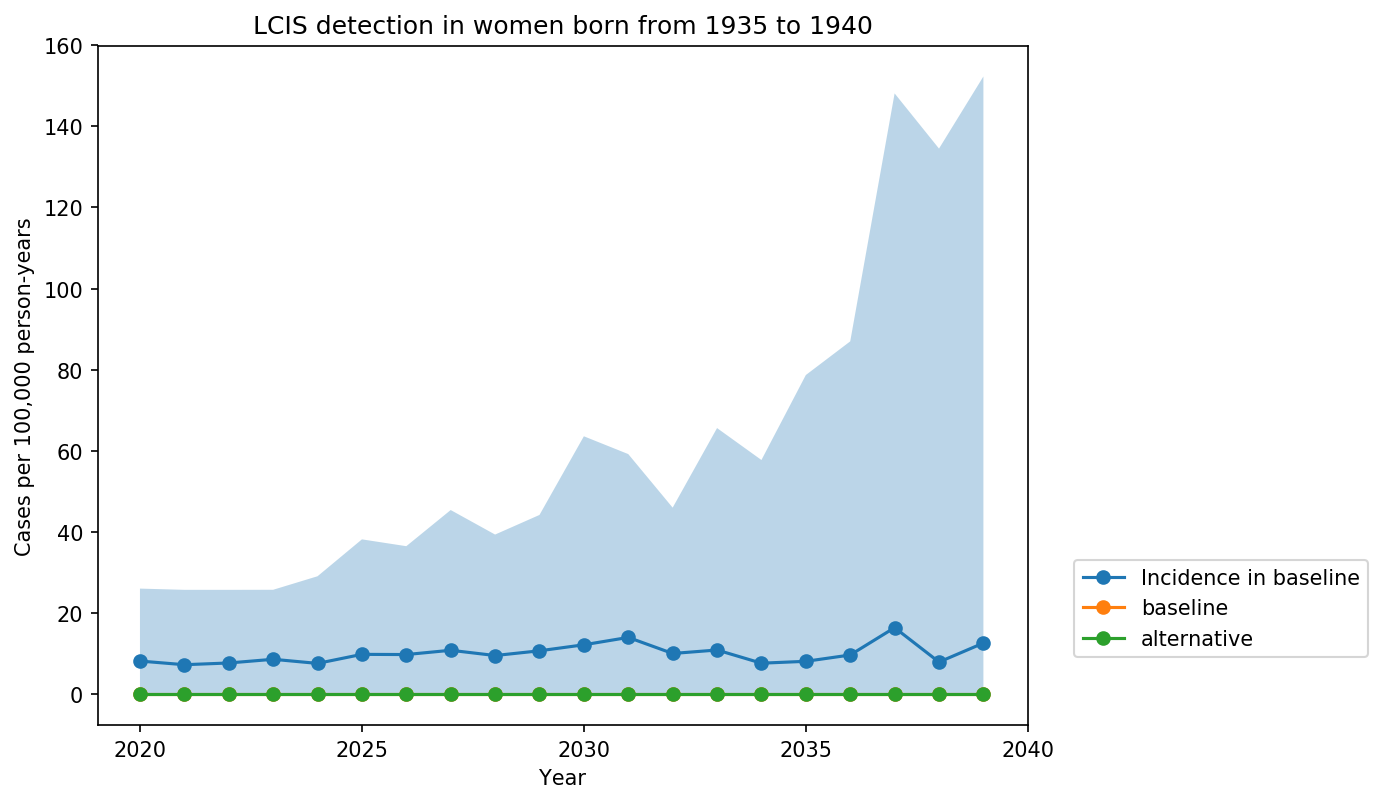

In [36]:
with PdfPages('C:/Users/yongqx2/Desktop/Sim Science/Swiss RE Cancer/results_from_model_3.pdf') as pdf:
    for detection_measure, incidence_measure in measures:
        for age_cohort in age_cohorts:
            plot_over_year(rate_summary, detection_measure, incidence_measure, age_cohort)
            pdf.savefig(bbox_inches='tight')